# Advanced Regression Assignment : Predicting House Price

by: Vasanth Kumar

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 
Also, determine the optimal value of lambda for ridge and lasso regression.


#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [279]:
#Loading essential libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [280]:
#Data loading

df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',df.shape[1]+1)

In [281]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [282]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking null values percentage

In [284]:
null_values = round(100*(df.isnull().sum()/len(df.index)), 2)
null_values.loc[null_values > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [285]:
#Some Categories are seems NA but they have different meaning for that.

df['Alley'].fillna( 'No alley access', inplace = True)
df['PoolQC'].fillna( 'No Pool', inplace = True)
df['Fence'].fillna( 'No Fence', inplace = True)
df['MiscFeature'].fillna( 'None', inplace = True)
df['FireplaceQu'].fillna( 'No Fireplace', inplace = True)
df['MasVnrType'].fillna( 'None', inplace = True)
df['BsmtQual'].fillna( 'No Basement', inplace = True)
df['BsmtCond'].fillna( 'No Basement', inplace = True)
df['BsmtExposure'].fillna( 'No Basement', inplace = True)
df['BsmtFinType1'].fillna( 'No Basement', inplace = True)
df['BsmtFinType2'].fillna( 'No Basement', inplace = True)
df['GarageType'].fillna( 'No Garage', inplace = True)
df['GarageFinish'].fillna( 'No Garage', inplace = True)
df['GarageQual'].fillna( 'No Garage', inplace = True)
df['GarageCond'].fillna( 'No Garage', inplace = True)


In [286]:
#Checking null again

null_values = round(100*(df.isnull().sum()/len(df.index)), 2)
null_values.loc[null_values > 0]

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [287]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


#### One one variable have 17.24% missing value ,rest have arround 5% missing values.
#### So we will impute them

In [288]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Few plots

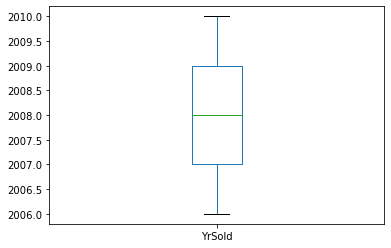

In [289]:
df['YrSold'].plot.box()
plt.show()

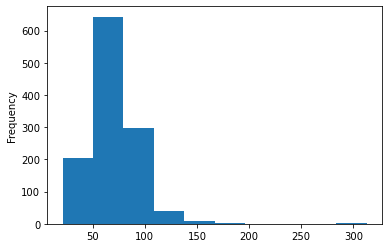

In [290]:
df['LotFrontage'].plot.hist()
plt.show()

In [291]:
df['LotFrontage'].describe([0.999])


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
50%        69.000000
99.9%     286.800000
max       313.000000
Name: LotFrontage, dtype: float64

### Imputing

In [292]:
#Taking copy

df_imputed = df[:]

In [293]:
null_values = round(100*(df_imputed.isnull().sum()/len(df_imputed.index)), 2)
c1 = null_values.loc[null_values > 0]
c1

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

Percentage of null values in above variables are less so we will impute them with mode.

In [294]:
#Imputing

for i in c1.index:
    if df_imputed[i].dtype == object:
        print(i)
        df_imputed[i].fillna(df_imputed[i].mode()[0],inplace= True)
    else:
        df_imputed[i].fillna(df_imputed[i].mode()[0],inplace=True)

Electrical


In [295]:

print('mean - df_imputed[LotFrontage]:  ',np.floor(np.mean(df_imputed['LotFrontage'])))
df_imputed['LotFrontage'].describe([0.75,0.8,0.9,0.99,0.999])

mean - df_imputed[LotFrontage]:   68.0


count    1460.000000
mean       68.267123
std        22.356355
min        21.000000
50%        63.000000
75%        79.000000
80%        80.000000
90%        92.000000
99%       137.410000
99.9%     252.871000
max       313.000000
Name: LotFrontage, dtype: float64

Checking Null values again

In [296]:
#No null left

null_values = round(100*(df_imputed.isnull().sum()/len(df_imputed.index)), 2)
c1 = null_values.loc[null_values > 0]
c1

Series([], dtype: float64)

### Analysing

In [297]:
df_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [298]:
df_imputed.shape

(1460, 81)

In [299]:
df_imputed.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [300]:
#Segmentig Years
#1871-80,1881-90

year_cat = []
n = 10
for i in range(1870,2011):
    if i%n == 0:
        #print(str(i+1)+'-'+str(i+n))
        #s = (str(i+1)+'-'+str(i+n)
        year_cat.append([(i+1),(i+n)])
        
print(year_cat)

def check_x (x):
#     x1 = int(x)
    for yr in year_cat:
        if (x >= yr[0]) & (x <= yr[1]):
            return (str(yr[0])+'-'+ str(yr[1]))

years_var=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] #,'YrSold'

for i in years_var:
    #print(i)
    df_imputed[i] = df_imputed[i].apply(check_x )
    
df_imputed.head()

[[1871, 1880], [1881, 1890], [1891, 1900], [1901, 1910], [1911, 1920], [1921, 1930], [1931, 1940], [1941, 1950], [1951, 1960], [1961, 1970], [1971, 1980], [1981, 1990], [1991, 2000], [2001, 2010], [2011, 2020]]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2001-2010,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1971-1980,1971-1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1971-1980,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001-2010,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1911-1920,1961-1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1991-2000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991-2000,1991-2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991-2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [301]:
df_imputed['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

In [302]:
df_imputed['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [303]:
# Few categorical variables are integer type so converting to object
# So the that we can separate continous variable for checking correlation metrix.

other_cat_var = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
 'Fireplaces', 'GarageCars','MoSold','YrSold']

In [304]:
# Checking types

df_imputed[other_cat_var].dtypes

OverallQual     int64
OverallCond     int64
BsmtFullBath    int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
KitchenAbvGr    int64
TotRmsAbvGrd    int64
Fireplaces      int64
GarageCars      int64
MoSold          int64
YrSold          int64
dtype: object

In [305]:
# Converting to object

df_imputed[other_cat_var] = df_imputed[other_cat_var].astype('object')
df_imputed[other_cat_var].dtypes

OverallQual     object
OverallCond     object
BsmtFullBath    object
FullBath        object
HalfBath        object
BedroomAbvGr    object
KitchenAbvGr    object
TotRmsAbvGrd    object
Fireplaces      object
GarageCars      object
MoSold          object
YrSold          object
dtype: object

#### Separating Categorical and numerical variables

In [306]:
cat_col = []
num_col = []
for i in df_imputed.columns:
    if df_imputed[i].dtype == object:
        cat_col.append(i)
    else:
        num_col.append(i)
        

In [307]:
print('Categorical Variables :',len(cat_col))
print(cat_col)
print()
print('Continous Variables :',len(num_col))
print(num_col)


Categorical Variables : 58
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Continous Variables : 23
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 

### Checking correletion of all the continous variable with Sale Price

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.329220
LotArea          0.263843
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtHalfBath    -0.016844
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
dtype: float64

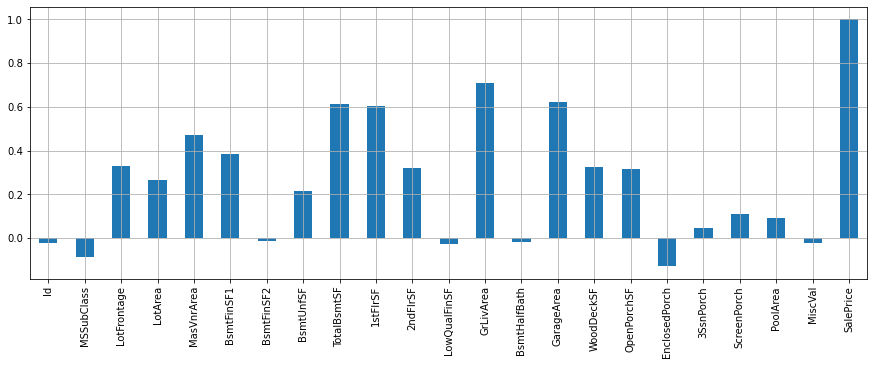

In [308]:
plt.figure(figsize=(15,5))
df_imputed[num_col].corrwith(df_imputed['SalePrice']).plot.bar().grid(True)
df_imputed[num_col].corrwith(df_imputed['SalePrice'])

### Thresholding highly correlated variables

In [309]:
threshold = 0.15
sale_corr = df_imputed[num_col].corrwith(df_imputed['SalePrice'])
sale_corr_df = sale_corr[(sale_corr > threshold) | (sale_corr < -threshold)].sort_values(ascending=False).to_frame()
sale_corr_df

,0
SalePrice,1.000000
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
MasVnrArea,0.472614
BsmtFinSF1,0.386420
LotFrontage,0.329220
WoodDeckSF,0.324413
2ndFlrSF,0.319334


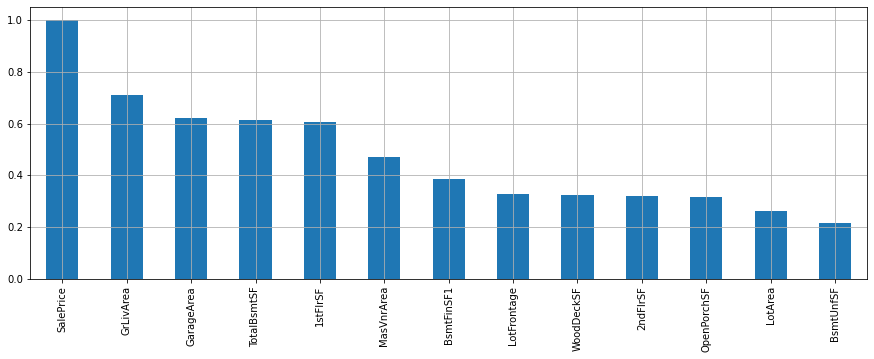

In [310]:
plt.figure(figsize=(15,5))
sale_corr[(sale_corr > threshold) | (sale_corr < -threshold)].sort_values(ascending=False).plot.bar().grid(True)

In [311]:
sale_corr[(sale_corr > threshold) | (sale_corr < -threshold)].sort_values(ascending=False).shape

(13,)

There are 12 continuous variable are highly correlated with SalePrice variable

In [312]:
print(len(sale_corr_df.index[1:]))
sale_corr_df.index[1:]

12


Index(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'LotArea', 'BsmtUnfSF'],
      dtype='object')

### Ploting highly correlated continous variable

Continous Variables : 13
Index(['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'LotArea', 'BsmtUnfSF'],
      dtype='object')
Continous variable Plotting


<Figure size 1080x720 with 0 Axes>

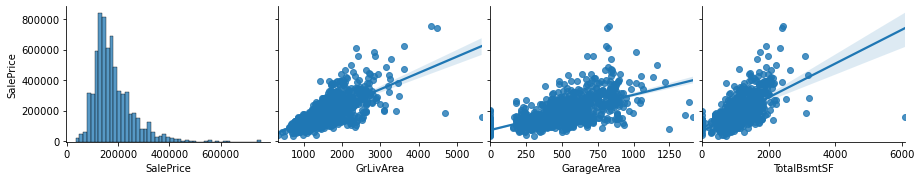

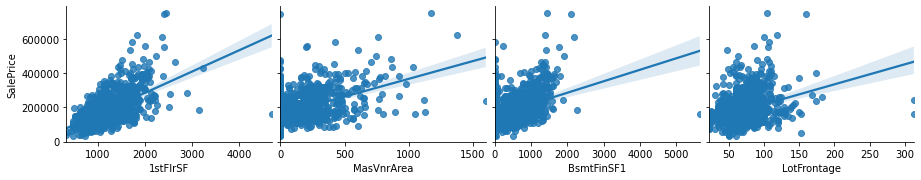

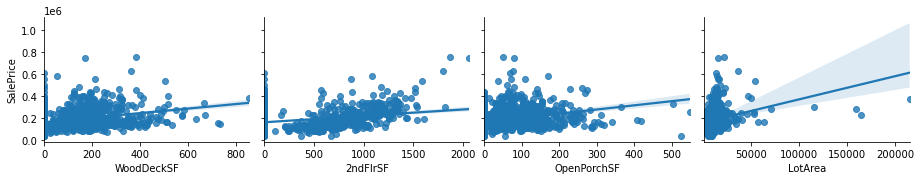

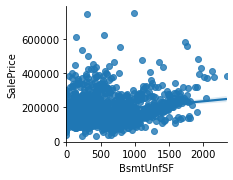

In [313]:

selected_cont_col = sale_corr_df.index    
print('Continous Variables :',len(selected_cont_col))
print(selected_cont_col)

# print()
print('Continous variable Plotting')
plt.figure(figsize = (15, 10) )
for i in range(0,len(selected_cont_col)):
    if i % 4 ==0:
        #print(i, i+4)
        sns.pairplot(df_imputed, x_vars= selected_cont_col[i:i+4],
             y_vars=['SalePrice'],kind='reg',aspect = 1.3 )
plt.show()


#### Observations:

- 'SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
   'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
   'OpenPorchSF', 'LotArea', 'BsmtUnfSF' - are highly correlated with Sale price.

### Checking the Variable which are Less correlated with sale price variables

In [314]:
sale_no_corr_df = sale_corr[(sale_corr < threshold) & (sale_corr > -threshold)].sort_values(ascending=False).to_frame()
# sale_no_corr_df

Numerical Variables : 10
Index(['ScreenPorch', 'PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'MSSubClass', 'EnclosedPorch'],
      dtype='object')

Numerical Plot


<Figure size 1080x720 with 0 Axes>

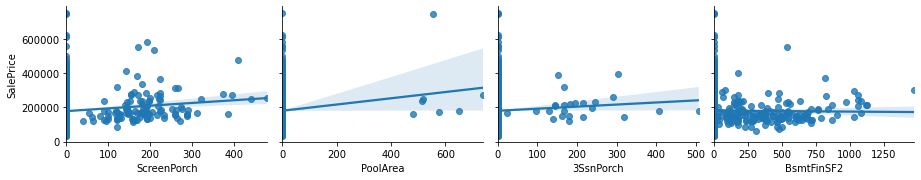

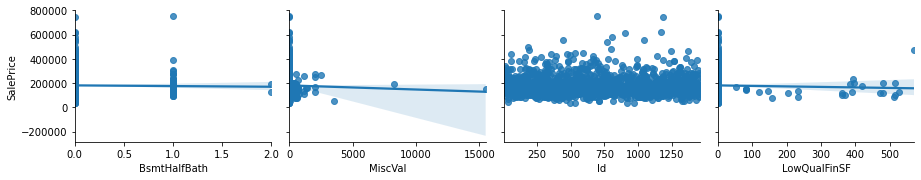

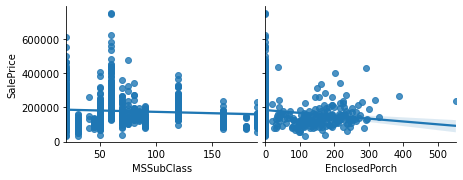

In [315]:

unselected_cont_col = sale_no_corr_df.index    
print('Numerical Variables :',len(unselected_cont_col))
print(unselected_cont_col)

print()
print('Numerical Plot')
plt.figure(figsize = (15, 10) )
for i in range(0,len(unselected_cont_col)):
    if i % 4 ==0:
        #print(i, i+4)
        sns.pairplot(df_imputed, x_vars= unselected_cont_col[i:i+4],
             y_vars=['SalePrice'],kind='reg',aspect = 1.3 )
plt.show()
    

#### Observations:

- 'ScreenPorch', 'PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
  'MiscVal', 'Id', 'LowQualFinSF', 'MSSubClass', 'EnclosedPorch' - are having no correlation with Sale price.

### Ploting all the categorical variables

In [316]:
len(cat_col)

58

In [317]:
57/3


19.0


Categorical Ploting


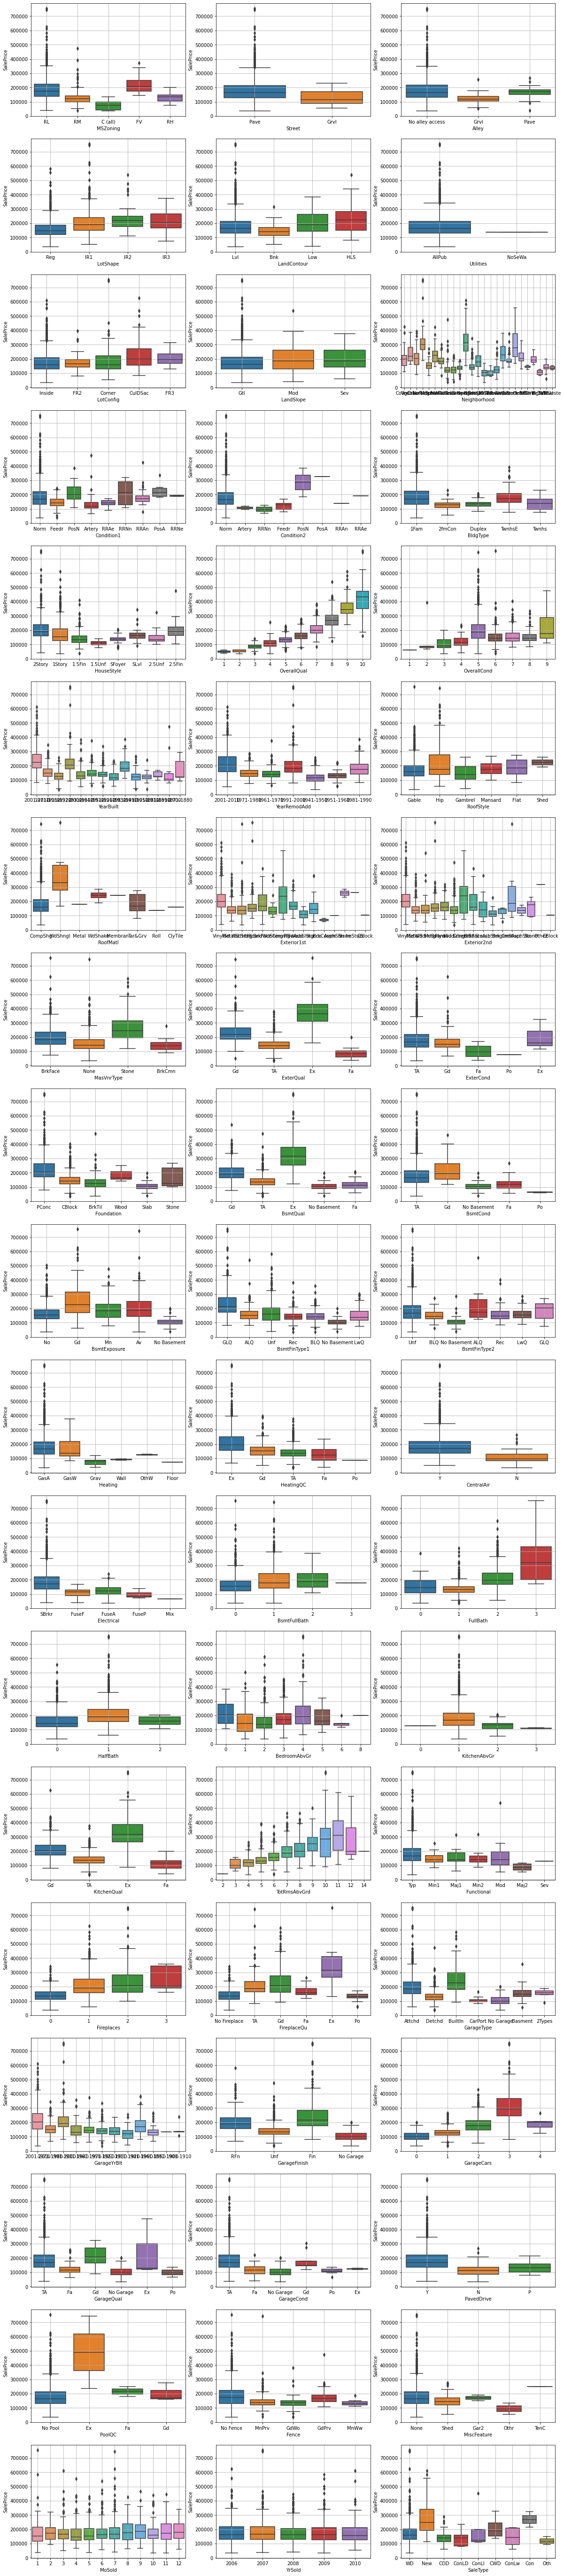

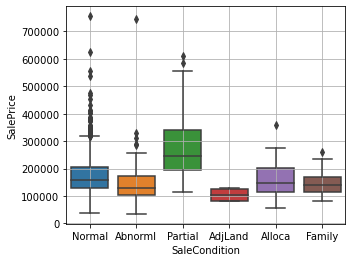

In [318]:
#Plotting

#Rule = 17 * 3 = 51
#subplot.x*subplot.y = len(totalplot)

print()
print('Categorical Ploting')
plt.figure(figsize=(20, 100))
for i in range(0,len(cat_col[:57])):
    plt.subplot(19,3,i+1)
    sns.boxplot(x = cat_col[i], y = 'SalePrice', data = df_imputed).grid(True)
plt.show()
plt.figure(figsize=(5, 4))
sns.boxplot(x = cat_col[57], y = 'SalePrice', data = df_imputed).grid(True)
plt.show()

#### Observations:

- Some of the categorical variable are having good correlation with Sale price.

### Droping Some Continous variables which have -0.15 to 0.15 correlation values

In [319]:
#Droping and creating new df

df_clean = df_imputed.drop(columns = sale_no_corr_df.index, axis=1)
df_clean.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2001-2010,RFn,2,548,TA,TA,Y,0,61,No Pool,No Fence,None,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1971-1980,1971-1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1971-1980,RFn,2,460,TA,TA,Y,298,0,No Pool,No Fence,None,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001-2010,RFn,2,608,TA,TA,Y,0,42,No Pool,No Fence,None,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1911-1920,1961-1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1991-2000,Unf,3,642,TA,TA,Y,0,35,No Pool,No Fence,None,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991-2000,1991-2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991-2000,RFn,3,836,TA,TA,Y,192,84,No Pool,No Fence,None,12,2008,WD,Normal,250000


In [320]:
df_clean.shape

(1460, 71)

In [321]:
df_clean[cat_col].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [322]:
df_clean[cat_col].shape

(1460, 58)

### Data Preparation

#### Separating and converting some ordinal categorical variables

In [323]:
ordinal_cat_var =['Utilities','ExterQual',
                  'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  'BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu',
                 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']


print('Ordinal Categorical Data')
print()
for i in ordinal_cat_var:
    print(i)
    print(df_clean[i].unique())
    print()
    
len(ordinal_cat_var)

Ordinal Categorical Data

Utilities
['AllPub' 'NoSeWa']

ExterQual
['Gd' 'TA' 'Ex' 'Fa']

ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']

BsmtQual
['Gd' 'TA' 'Ex' 'No Basement' 'Fa']

BsmtCond
['TA' 'Gd' 'No Basement' 'Fa' 'Po']

BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'No Basement']

BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']

BsmtFinType2
['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']

HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']

CentralAir
['Y' 'N']

KitchenQual
['Gd' 'TA' 'Ex' 'Fa']

FireplaceQu
['No Fireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

GarageFinish
['RFn' 'Unf' 'Fin' 'No Garage']

GarageQual
['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']

GarageCond
['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']

PoolQC
['No Pool' 'Ex' 'Fa' 'Gd']

Fence
['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']



17

In [324]:
#Converting to ordered numerical 
# We dont want to convert these ordinal categorical variables to dummy variables

ordinal_cat_dict = {
"Utilities" : {'AllPub':4,'NoSeWa':2,'NoSewr':3,'ELO':1 },
"ExterQual" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'NA':0 },
"ExterCond" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'NA':0 },
"BsmtQual" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No Basement':0 },
"BsmtCond" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No Basement':0 },
"BsmtExposure" : {'No':1, 'Gd':4, 'Mn':2, 'Av':3,'No Basement':0},
"BsmtFinType1" : {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2,'No Basement':0},
"BsmtFinType2" : {'GLQ':6, 'ALQ':5,'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2,'No Basement':0},
"HeatingQC" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'NA':0 },
"CentralAir" : {'Y':1, 'N':0},
"KitchenQual" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'NA':0 },
"GarageFinish" : {'RFn':2, 'Unf':1, 'Fin':3,'No Garage':0},
"GarageQual" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No Garage':0 },
"GarageCond" : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No Garage':0 },
"FireplaceQu":{'No Fireplace':0, 'TA':3, 'Gd':4, 'Fa':2,'Ex':5, 'Po':1},
"PoolQC":{'No Pool':0 ,'Ex':3, 'Fa':1, 'Gd':2},
"Fence":{'No Fence':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1},
}

for i in ordinal_cat_dict:
    #print(ordinal_cat_dict[i])
    df_clean[i] = df_clean[i].map(ordinal_cat_dict[i])
    
df_clean.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,No alley access,Reg,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,150,856,GasA,5,1,SBrkr,856,854,1710,1,2,1,3,1,4,8,Typ,0,0,Attchd,2001-2010,2,2,548,3,3,Y,0,61,0,0,None,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,No alley access,Reg,Lvl,4,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1971-1980,1971-1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,284,1262,GasA,5,1,SBrkr,1262,0,1262,0,2,0,3,1,3,6,Typ,1,3,Attchd,1971-1980,2,2,460,3,3,Y,298,0,0,0,None,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,No alley access,IR1,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,434,920,GasA,5,1,SBrkr,920,866,1786,1,2,1,3,1,4,6,Typ,1,3,Attchd,2001-2010,2,2,608,3,3,Y,0,42,0,0,None,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,No alley access,IR1,Lvl,4,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1911-1920,1961-1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,540,756,GasA,4,1,SBrkr,961,756,1717,1,1,0,3,1,4,7,Typ,1,4,Detchd,1991-2000,1,3,642,3,3,Y,0,35,0,0,None,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,No alley access,IR1,Lvl,4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991-2000,1991-2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,490,1145,GasA,5,1,SBrkr,1145,1053,2198,1,2,1,4,1,4,9,Typ,1,3,Attchd,1991-2000,2,3,836,3,3,Y,192,84,0,0,None,12,2008,WD,Normal,250000


In [325]:
# Converting type of Ordinal categorical variable to int 

df_clean[ordinal_cat_dict.keys()].astype(int)

,Utilities,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,FireplaceQu,PoolQC,Fence
0,4,4,3,4,3,1,6,1,5,1,4,2,3,3,0,0,0
1,4,3,3,4,3,4,5,1,5,1,3,2,3,3,3,0,0
2,4,4,3,4,3,2,6,1,5,1,4,2,3,3,3,0,0
3,4,3,3,3,4,1,5,1,4,1,4,1,3,3,4,0,0
4,4,4,3,4,3,3,6,1,5,1,4,2,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,3,3,4,3,1,1,1,5,1,3,2,3,3,3,0,0
1456,4,3,3,4,3,1,5,3,3,1,3,1,3,3,3,0,3
1457,4,5,4,3,4,1,6,1,5,1,4,2,3,3,4,0,4
1458,4,3,3,3,3,2,6,3,4,1,4,1,3,3,0,0,0


In [326]:
df_clean.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,No alley access,Reg,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,150,856,GasA,5,1,SBrkr,856,854,1710,1,2,1,3,1,4,8,Typ,0,0,Attchd,2001-2010,2,2,548,3,3,Y,0,61,0,0,None,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,No alley access,Reg,Lvl,4,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1971-1980,1971-1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,284,1262,GasA,5,1,SBrkr,1262,0,1262,0,2,0,3,1,3,6,Typ,1,3,Attchd,1971-1980,2,2,460,3,3,Y,298,0,0,0,None,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,No alley access,IR1,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,434,920,GasA,5,1,SBrkr,920,866,1786,1,2,1,3,1,4,6,Typ,1,3,Attchd,2001-2010,2,2,608,3,3,Y,0,42,0,0,None,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,No alley access,IR1,Lvl,4,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1911-1920,1961-1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,540,756,GasA,4,1,SBrkr,961,756,1717,1,1,0,3,1,4,7,Typ,1,4,Detchd,1991-2000,1,3,642,3,3,Y,0,35,0,0,None,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,No alley access,IR1,Lvl,4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991-2000,1991-2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,490,1145,GasA,5,1,SBrkr,1145,1053,2198,1,2,1,4,1,4,9,Typ,1,3,Attchd,1991-2000,2,3,836,3,3,Y,192,84,0,0,None,12,2008,WD,Normal,250000


In [327]:
#Separating dummies required and no dummies required variables

dummies_required = []
no_dummies_required = []
for i in df_clean.columns:
    if df_clean[i].dtype == object:
        #print(i)
        dummies_required.append(i)
    else:
        no_dummies_required.append(i)

In [328]:
#Checking the variable list

print('dummies_required :', len(dummies_required))
print(dummies_required)
print()
print("no_dummies_required :",  len(no_dummies_required))
print(no_dummies_required)

dummies_required : 41
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

no_dummies_required : 30
['LotFrontage', 'LotArea', 'Utilities', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',

### Creating dummy variables

In [329]:
#Creating dummy variables

temp_cat_df = pd.DataFrame()
for i in dummies_required:
    #print(i)
    t = pd.get_dummies(df_clean[i],prefix = i, prefix_sep='_' ,drop_first = True)
    temp_cat_df = pd.concat([temp_cat_df, t], axis = 1 )

temp_cat_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,GarageYrBlt_1981-1990,GarageYrBlt_1991-2000,GarageYrBlt_2001-2010,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [330]:
df_clean[no_dummies_required].head()

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice
0,65.0,8450,4,196.0,4,3,4,3,1,6,706,1,150,856,5,1,856,854,1710,4,0,2,548,3,3,0,61,0,0,208500
1,80.0,9600,4,0.0,3,3,4,3,4,5,978,1,284,1262,5,1,1262,0,1262,3,3,2,460,3,3,298,0,0,0,181500
2,68.0,11250,4,162.0,4,3,4,3,2,6,486,1,434,920,5,1,920,866,1786,4,3,2,608,3,3,0,42,0,0,223500
3,60.0,9550,4,0.0,3,3,3,4,1,5,216,1,540,756,4,1,961,756,1717,4,4,1,642,3,3,0,35,0,0,140000
4,84.0,14260,4,350.0,4,3,4,3,3,6,655,1,490,1145,5,1,1145,1053,2198,4,3,2,836,3,3,192,84,0,0,250000


In [331]:
#Dropping redandunt variables before merging

df_clean.drop(dummies_required, axis = 1, inplace = True)
df_clean.shape

(1460, 30)

In [332]:
df_clean

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice
0,65.0,8450,4,196.0,4,3,4,3,1,6,706,1,150,856,5,1,856,854,1710,4,0,2,548,3,3,0,61,0,0,208500
1,80.0,9600,4,0.0,3,3,4,3,4,5,978,1,284,1262,5,1,1262,0,1262,3,3,2,460,3,3,298,0,0,0,181500
2,68.0,11250,4,162.0,4,3,4,3,2,6,486,1,434,920,5,1,920,866,1786,4,3,2,608,3,3,0,42,0,0,223500
3,60.0,9550,4,0.0,3,3,3,4,1,5,216,1,540,756,4,1,961,756,1717,4,4,1,642,3,3,0,35,0,0,140000
4,84.0,14260,4,350.0,4,3,4,3,3,6,655,1,490,1145,5,1,1145,1053,2198,4,3,2,836,3,3,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,0.0,3,3,4,3,1,1,0,1,953,953,5,1,953,694,1647,3,3,2,460,3,3,0,40,0,0,175000
1456,85.0,13175,4,119.0,3,3,4,3,1,5,790,3,589,1542,3,1,2073,0,2073,3,3,1,500,3,3,349,0,0,3,210000
1457,66.0,9042,4,0.0,5,4,3,4,1,6,275,1,877,1152,5,1,1188,1152,2340,4,4,2,252,3,3,0,60,0,4,266500
1458,68.0,9717,4,0.0,3,3,3,3,2,6,49,3,0,1078,4,1,1078,0,1078,4,0,1,240,3,3,366,0,0,0,142125


In [333]:
#Merging dummy veariables into main df

df_main = pd.concat([df_clean, temp_cat_df], axis = 1 )
df_main.head()

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,GarageYrBlt_1981-1990,GarageYrBlt_1991-2000,GarageYrBlt_2001-2010,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,4,196.0,4,3,4,3,1,6,706,1,150,856,5,1,856,854,1710,4,0,2,548,3,3,0,61,0,0,208500,0,0,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,4,0.0,3,3,4,3,4,5,978,1,284,1262,5,1,1262,0,1262,3,3,2,460,3,3,298,0,0,0,181500,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,4,162.0,4,3,4,3,2,6,486,1,434,920,5,1,920,866,1786,4,3,2,608,3,3,0,42,0,0,223500,0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,4,0.0,3,3,3,4,1,5,216,1,540,756,4,1,961,756,1717,4,4,1,642,3,3,0,35,0,0,140000,0,0,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,4,350.0,4,3,4,3,3,6,655,1,490,1145,5,1,1145,1053,2198,4,3,2,836,3,3,192,84,0,0,250000,0,0,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [334]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 286 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(28), uint8(256)
memory usage: 707.3 KB


# Model Creation

### Spliting data into train and test

In [335]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_main, train_size = 0.7, test_size = 0.3, random_state = 100)

In [336]:
df_train.shape

(1021, 286)

In [337]:
df_train.head()

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,GarageYrBlt_1981-1990,GarageYrBlt_1991-2000,GarageYrBlt_2001-2010,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,67.0,5604,4,0.0,3,3,3,3,1,3,468,1,396,864,3,0,864,0,864,3,0,0,0,0,0,0,0,0,0,98000,0,0,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,90.0,9900,4,256.0,4,3,4,3,4,6,987,1,360,1347,5,1,1372,1274,2646,4,3,2,656,3,3,340,60,0,0,260000,0,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,52.0,8741,4,0.0,3,3,3,2,1,2,94,1,641,735,3,1,798,689,1487,3,4,1,220,3,3,0,140,0,3,113000,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
986,59.0,5310,4,0.0,3,4,3,2,1,1,0,1,485,485,4,1,1001,634,1635,4,0,1,255,2,3,394,0,0,0,117000,0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1416,60.0,11340,4,0.0,3,3,3,3,1,1,0,1,777,777,4,1,1246,1044,2290,3,0,1,560,3,3,0,0,0,0,122500,0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Checking the variables which are continous and ordinal categorical variable , because Feature scaling is required for them. 

In [338]:
cl = []
for i in df_train.columns:
    if df_train[i].value_counts().count() > 3:
        print(i ,':', df_train[i].unique()[:10])
        cl.append(i)

LotFrontage : [67. 90. 52. 59. 60. 50. 65. 79. 61. 70.]
LotArea : [ 5604  9900  8741  5310 11340  8405  8385 12327  8544  7259]
MasVnrArea : [   0.  256.  220.  340.  189.  640.  180.  243.   95. 1047.]
ExterQual : [3 4 2 5]
ExterCond : [3 4 2 5]
BsmtQual : [3 4 0 5 2]
BsmtCond : [3 2 4 0 1]
BsmtExposure : [1 4 3 0 2]
BsmtFinType1 : [3 6 2 1 0 5 4]
BsmtFinSF1 : [ 468  987   94    0  241  595 1441  774  111  456]
BsmtFinType2 : [1 4 0 2 6 3 5]
BsmtUnfSF : [396 360 641 485 777 229 390  55   0 104]
TotalBsmtSF : [ 864 1347  735  485  777  861  985 1496    0 1028]
HeatingQC : [3 5 4 2 1]
1stFlrSF : [ 864 1372  798 1001 1246  961  985 1496 1040 1436]
2ndFlrSF : [   0 1274  689  634 1044  406  636  884  672  780]
GrLivArea : [ 864 2646 1487 1635 2290 1367  985 2132 1040 2320]
KitchenQual : [3 4 2 5]
FireplaceQu : [0 3 4 1 2 5]
GarageFinish : [0 2 1 3]
GarageArea : [  0 656 220 255 560 384 328 612 400 180]
GarageQual : [0 3 2 4 1 5]
GarageCond : [0 3 2 4 1 5]
WoodDeckSF : [  0 340 394 210 349

In [339]:
# Utilities was missing in the above check, so adding them

cl.append("Utilities")

In [340]:
print(cl)

['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'SalePrice', 'Utilities']


### Scaling

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Scaling continous data and ordinal categorical data
df_train[cl] = scaler.fit_transform(df_train[cl])
df_train[cl].head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,Utilities
210,-0.044006,-0.473765,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,-0.605626,-0.279557,0.043512,-0.278494,-0.374367,-0.430911,-1.179071,-0.765065,-0.787597,-1.228053,-0.776063,-0.983487,-1.902619,-2.217786,-3.867168,-3.860109,-0.743160,-0.709347,-0.058832,-0.453774,-1.042855,0.031311
318,0.984241,-0.056845,0.809137,1.053395,-0.260816,0.579028,0.123940,2.146648,1.140483,1.160345,-0.278494,-0.454644,0.621579,0.873498,0.511914,2.140556,2.123103,0.741868,0.659950,0.321278,0.867506,0.270148,0.272542,1.989482,0.197980,-0.058832,-0.453774,1.006390,0.031311
239,-0.714602,-0.169324,-0.558025,-0.698260,-0.260816,-0.532226,-1.609519,-0.605626,-0.752904,-0.761296,-0.278494,0.171964,-0.712011,-1.179071,-0.930972,0.795996,-0.056465,-0.776063,1.207763,-0.790670,-1.183084,0.270148,0.272542,-0.743160,1.407748,-0.058832,2.091847,-0.853110,0.031311
986,-0.401657,-0.502297,-0.558025,-0.698260,2.602556,-0.532226,-1.609519,-0.605626,-1.226251,-0.963574,-0.278494,-0.175904,-1.256778,-0.152787,-0.420683,0.669584,0.221858,0.741868,-0.983487,-0.790670,-1.018473,-1.108957,0.272542,2.423490,-0.709347,-0.058832,-0.453774,-0.802511,0.031311
1416,-0.356951,0.082905,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,-0.605626,-1.226251,-0.963574,-0.278494,0.475233,-0.620490,-0.152787,0.195183,1.611926,1.453624,-0.776063,-0.983487,-0.790670,0.416000,0.270148,0.272542,-0.743160,-0.709347,-0.058832,-0.453774,-0.732938,0.031311


In [342]:
df_train.head()

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,GarageYrBlt_1981-1990,GarageYrBlt_1991-2000,GarageYrBlt_2001-2010,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.044006,-0.473765,0.031311,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,-0.605626,-0.279557,0.043512,-0.278494,-0.374367,-0.430911,-1.179071,0,-0.765065,-0.787597,-1.228053,-0.776063,-0.983487,-1.902619,-2.217786,-3.867168,-3.860109,-0.743160,-0.709347,-0.058832,-0.453774,-1.042855,0,0,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.984241,-0.056845,0.031311,0.809137,1.053395,-0.260816,0.579028,0.123940,2.146648,1.140483,1.160345,-0.278494,-0.454644,0.621579,0.873498,1,0.511914,2.140556,2.123103,0.741868,0.659950,0.321278,0.867506,0.270148,0.272542,1.989482,0.197980,-0.058832,-0.453774,1.006390,0,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,-0.714602,-0.169324,0.031311,-0.558025,-0.698260,-0.260816,-0.532226,-1.609519,-0.605626,-0.752904,-0.761296,-0.278494,0.171964,-0.712011,-1.179071,1,-0.930972,0.795996,-0.056465,-0.776063,1.207763,-0.790670,-1.183084,0.270148,0.272542,-0.743160,1.407748,-0.058832,2.091847,-0.853110,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
986,-0.401657,-0.502297,0.031311,-0.558025,-0.698260,2.602556,-0.532226,-1.609519,-0.605626,-1.226251,-0.963574,-0.278494,-0.175904,-1.256778,-0.152787,1,-0.420683,0.669584,0.221858,0.741868,-0.983487,-0.790670,-1.018473,-1.108957,0.272542,2.423490,-0.709347,-0.058832,-0.453774,-0.802511,0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1416,-0.356951,0.082905,0.031311,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,-0.605626,-1.226251,-0.963574,-0.278494,0.475233,-0.620490,-0.152787,1,0.195183,1.611926,1.453624,-0.776063,-0.983487,-0.790670,0.416000,0.270148,0.272542,-0.743160,-0.709347,-0.058832,-0.453774,-0.732938,0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [343]:
len(df_train.columns)

286

#### separating predictor and target variables

In [344]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [345]:
X_train.shape

(1021, 285)

### feature selection using RFE

In [346]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [347]:
# Running RFE with the output number of the variable equal to 200
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 200)
rfe = rfe.fit(X_train, y_train)

In [348]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [349]:
X_train.columns[~rfe.support_]

Index(['Utilities', 'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinSF1',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'Fence',
       'Alley_No alley access', 'Alley_Pave', 'LotShape_IR2', 'LotShape_Reg',
       'LandContour_HLS', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_RRAe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAn',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2.5Unf',
       'HouseStyle_SLvl', 'YearBuilt_1881-1890', 'YearRemodAdd_1951-1960',
       'YearRemodAdd_1961-1970', 'YearRemodAdd_1981-1990',
       'YearRemodAdd_1991-2000', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
    

### Model building

In [350]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,LotFrontage,LotArea,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,KitchenQual,GarageArea,OpenPorchSF,PoolQC,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR3,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1901-1910,GarageYrBlt_1911-1920,GarageYrBlt_1961-1970,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_2,MoSold_3,MoSold_4,MoSold_6,MoSold_8,MoSold_10,MoSold_12,YrSold_2008,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
210,-0.044006,-0.473765,-0.558025,-0.532226,0.123940,-0.605626,-0.278494,-0.374367,-0.430911,-0.765065,-0.787597,-0.776063,-2.217786,-0.709347,-0.058832,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
318,0.984241,-0.056845,0.809137,0.579028,0.123940,2.146648,-0.278494,-0.454644,0.621579,0.511914,2.140556,0.741868,0.867506,0.197980,-0.058832,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
239,-0.714602,-0.169324,-0.558025,-0.532226,-1.609519,-0.605626,-0.278494,0.171964,-0.712011,-0.930972,0.795996,-0.776063,-1.183084,1.407748,-0.058832,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
986,-0.401657,-0.502297,-0.558025,-0.532226,-1.609519,-0.605626,-0.278494,-0.175904,-1.256778,-0.420683,0.669584,0.741868,-1.018473,-0.709347,-0.058832,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1416,-0.356951,0.082905,-0.558025,-0.532226,0.123940,-0.605626,-0.278494,0.475233,-0.620490,0.195183,1.611926,-0.776063,0.416000,-0.709347,-0.058832,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.356951,-0.435334,-0.558025,-0.532226,0.123940,-0.605626,-0.278494,0.990346,-0.117125,-0.403087,-0.787597,-0.776063,-2.217786,-0.709347,-0.058832,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
802,-0.222831,-0.221924,-0.558025,0.579028,0.123940,1.229223,-0.278494,-1.079023,-0.727265,-1.106933,0.885633,0.741868,-0.289479,-0.437149,-0.058832,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
53,0.000701,3.861098,-0.558025,1.690282,0.123940,2.146648,-0.278494,-1.186059,1.700218,1.693370,-0.787597,0.741868,1.986864,0.379445,-0.058832,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
350,0.000701,-0.258706,1.375227,1.690282,0.123940,-0.605626,-0.278494,2.910309,1.759052,1.761241,-0.787597,2.259799,0.684081,0.107

In [351]:
X_train_rfe.shape

(1021, 200)

In [352]:
# Rfe failed to select required feature, So I removed manually below variables ONE BY ONE

drop_cols = ['SaleCondition_Partial','OverallCond_8'
            ,'KitchenAbvGr_1','TotRmsAbvGrd_7','Exterior2nd_CBlock',
            'TotRmsAbvGrd_4','TotRmsAbvGrd_8','TotRmsAbvGrd_3','TotRmsAbvGrd_14',
            'Exterior1st_AsphShn','Exterior1st_AsphShn',
            'GarageCars_2','RoofMatl_CompShg','MSZoning_RL','RoofStyle_Gable',
            'OverallQual_5','Functional_Typ','OverallCond_5','1stFlrSF',
            'YearBuilt_2001-2010','Exterior2nd_Other','Electrical_Mix',
            'MiscFeature_None','Street_Pave','FullBath_2','FullBath_1',
            'Heating_GasA','Exterior2nd_VinylSd','Exterior1st_VinylSd','GarageType_Attchd','SaleType_WD',
            'LandContour_Lvl','SaleCondition_Normal','Condition1_Norm',
            'LandContour_Lvl','SaleCondition_Normal','Condition1_Norm','Exterior1st_Wd Sdng',
            '2ndFlrSF','GarageArea', 'YearBuilt_1971-1980', 'YearBuilt_1961-1970', 'Exterior2nd_HdBoard',
            'KitchenAbvGr_2','BldgType_Duplex','BsmtQual','Neighborhood_Somerst',
            'LotFrontage','BsmtCond','Exterior2nd_Plywood','SaleCondition_Alloca','SaleCondition_AdjLand',
            'SaleType_Oth','SaleType_CWD','YrSold_2010','YrSold_2008','MoSold_2','MoSold_3','MoSold_4',
            'MoSold_6','MoSold_8','MoSold_10','MoSold_12','PoolQC','Neighborhood_IDOTRR',
            'Neighborhood_NPkVill','Neighborhood_OldTown','Neighborhood_StoneBr',
            'PoolQC','Neighborhood_IDOTRR','Neighborhood_NPkVill','Neighborhood_OldTown','Neighborhood_StoneBr',
            'RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl',
            'Exterior2nd_Wd Sdng','LandContour_Low','Condition2_RRAe','Condition2_RRNn',
            'LandSlope_Mod','Condition1_PosA','Condition1_PosN','Condition1_RRAn',
            'Condition2_PosA','Condition2_PosN','Condition1_RRNe','Condition1_RRNn',
            'Heating_Wall','MiscFeature_Othr','MiscFeature_Shed','SaleType_Con','SaleType_ConLD',
            'SaleType_ConLw','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev',
            'Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NWAmes',
            'BsmtFinType2', 'MSZoning_RH', 'HouseStyle_2.5Fin', 
            'OverallCond_2', 'OverallCond_4', 'YearBuilt_1981-1990',
            'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 
            'Exterior2nd_Stucco', 'Foundation_Stone', 'Foundation_Wood', 
            'Heating_Grav', 'Electrical_FuseP', 'BsmtFullBath_3',
            'Neighborhood_Blueste', 'BldgType_2fmCon', 'OverallQual_3', 'YearBuilt_1901-1910',
            'YearBuilt_1931-1940','RoofStyle_Hip', 'RoofMatl_Membran', 
            'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_WdShing',
            'HalfBath_2','BedroomAbvGr_2', 'BedroomAbvGr_5','BedroomAbvGr_6',
            'KitchenAbvGr_3', 'TotRmsAbvGrd_12', 'GarageType_BuiltIn',
            'MasVnrArea' ,'OpenPorchSF' ,'MSZoning_FV' ,'LotConfig_FR2',
            'LandSlope_Sev' ,'Neighborhood_SWISU' ,'OverallQual_4',
            'YearBuilt_1911-1920','YearRemodAdd_1971-1980','RoofStyle_Gambrel',
            'RoofStyle_Shed','Foundation_Slab','TotRmsAbvGrd_6' ,
            'TotRmsAbvGrd_9','Functional_Maj2','GarageType_CarPort',
            'GarageYrBlt_1901-1910','GarageYrBlt_1911-1920','GarageYrBlt_1961-1970',
            'Exterior1st_HdBoard','YearBuilt_1891-1900','YearBuilt_1921-1930',
            'YearBuilt_1941-1950','YearBuilt_1951-1960','Neighborhood_Veenker']


X_train_rfe1 = X_train_rfe.drop(drop_cols, axis=1)

len(drop_cols)

160

In [353]:
X_train_rfe1

,LotArea,BsmtExposure,BsmtUnfSF,TotalBsmtSF,KitchenQual,MSZoning_RM,LotShape_IR3,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NoRidge,Neighborhood_NridgHt,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,OverallQual_2,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_6,OverallCond_7,OverallCond_9,YearBuilt_1991-2000,YearRemodAdd_2001-2010,RoofStyle_Mansard,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_Wd Shng,FullBath_3,BedroomAbvGr_4,BedroomAbvGr_8,TotRmsAbvGrd_5,TotRmsAbvGrd_10,TotRmsAbvGrd_11,Fireplaces_2,Fireplaces_3,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_3,GarageCars_4,SaleType_New
210,-0.473765,-0.605626,-0.374367,-0.430911,-0.776063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
318,-0.056845,2.146648,-0.454644,0.621579,0.741868,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
239,-0.169324,-0.605626,0.171964,-0.712011,-0.776063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
986,-0.502297,-0.605626,-0.175904,-1.256778,0.741868,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1416,0.082905,-0.605626,0.475233,-0.620490,-0.776063,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.435334,-0.605626,0.990346,-0.117125,-0.776063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
802,-0.221924,1.229223,-1.079023,-0.727265,0.741868,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,3.861098,2.146648,-1.186059,1.700218,0.741868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
350,-0.258706,-0.605626,2.910309,1.759052,2.259799,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [354]:
# Adding a constant variable 
import statsmodels.api as sm 
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [355]:

lm = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     123.0
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:36:27   Log-Likelihood:                -440.36
No. Observations:                1021   AIC:                             980.7
Df Residuals:                     971   BIC:                             1227.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Checking multicollinearity using VIF metho

In [356]:
X_train_new = X_train_rfe.drop(drop_cols, axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_new

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
29,YearRemodAdd_2001-2010,2.81
3,TotalBsmtSF,2.77
16,HouseStyle_2Story,2.54
21,OverallQual_8,2.46
4,KitchenQual,2.30
20,OverallQual_7,2.23
28,YearBuilt_1991-2000,2.18
46,GarageCars_3,2.15
43,GarageType_Detchd,1.97
22,OverallQual_9,1.85


In [357]:
y_pred = lm.predict(X_train_rfe1)

In [358]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

141.63620048134123
0.13872301712178378
0.37245538943849876


In [359]:
from sklearn.metrics import r2_score
print('R-score: ', round(r2_score(y_train, y_pred),3))

R-score:  0.861


#### Observations: 

- Result seems good, R-score for train data is 85.4%
- RSS is 141.6
- Mse is 0.138
- Rmse is 0.37s
- Overall values looks good.

## Model Evaluation

In [360]:
# Residual analysis
y_res = y_train - y_pred

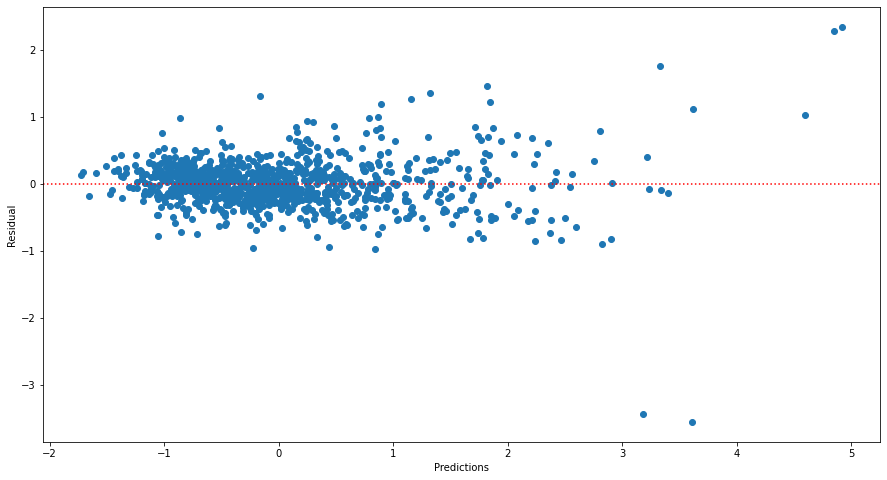

In [361]:
# data['res'] = y_res
plt.figure(figsize=(15, 8))
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Text(0.5, 0, 'Errors')

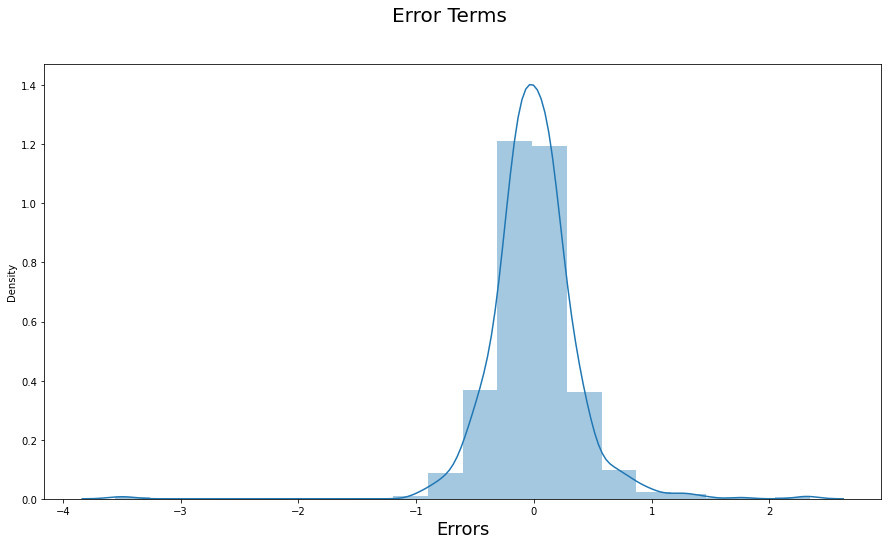

In [362]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(15, 8))
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

### Assumptions are true:

 - Residuals are homoscadastic
 - Residuals are normally distributed
 - Linear relationship exist between predictors vs target variables


### Predicting with Test Data

In [363]:
df_test

,LotFrontage,LotArea,Utilities,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,GarageYrBlt_1981-1990,GarageYrBlt_1991-2000,GarageYrBlt_2001-2010,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,60.0,9000,4,0.0,3,3,3,3,1,5,616,1,248,864,3,1,864,0,864,3,0,1,528,3,3,0,0,0,2,120500,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,89.0,11645,4,0.0,4,3,4,3,1,1,0,1,860,860,5,1,860,860,1720,4,0,2,565,3,3,0,70,0,0,196500,0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
780,63.0,7875,4,38.0,3,3,4,4,1,1,0,1,1237,1237,4,1,1253,0,1253,3,3,3,402,3,3,220,21,0,0,176000,0,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
382,79.0,9245,4,0.0,4,3,4,3,3,1,0,1,939,939,5,1,939,858,1797,4,0,2,639,3,3,144,53,0,0,213500,0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1170,76.0,9880,4,0.0,3,3,3,3,3,5,522,1,574,1096,3,1,1118,0,1118,3,1,3,358,3,3,203,0,2,4,171000,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,80.0,9600,4,132.0,3,3,3,3,1,5,991,1,50,1041,5,1,1041,0,1041,3,0,2,270,3,3,224,88,0,3,124500,0,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
555,58.0,6380,4,0.0,3,3,3,2,1,1,0,1,993,993,3,1,1048,0,1048,3,4,1,280,3,3,0,0,0,0,113000,0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
399,65.0,8125,4,100.0,4,3,4,3,1,6,812,1,280,1092,5,1,1112,438,1550,4,0,3,438,3,3,0,168,0,0,241000,1,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
545,60.0,13837,4,178.0,4,4,4,4,1,6,1002,2,0,1204,4,1,1377,806,2183,4,0,1,786,3,3,0,0,0,0,229000,0,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [364]:

df_test[cl] = scaler.fit_transform(df_test[cl])
df_test[cl].head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,SalePrice,Utilities
1436,-0.398075,-0.173195,-0.609112,-0.667658,-0.186709,-0.624812,0.102638,-0.553255,0.748587,0.420867,-0.280617,-0.769869,-0.473033,-1.229516,-0.795529,-0.810589,-1.268092,-0.761313,-1.067087,-0.830715,0.238541,0.245028,0.249494,-0.771409,-0.690864,-0.079890,1.080228,-0.764598,0.0
57,0.903097,0.114799,-0.609112,1.052544,-0.186709,0.596918,0.102638,-0.553255,-1.166048,-0.996087,-0.280617,0.667564,-0.483360,0.937599,-0.806680,1.148506,0.410443,0.720710,-1.067087,0.309891,0.409443,0.245028,0.249494,-0.771409,0.362909,-0.079890,-0.507490,0.182784,0.0
780,-0.263471,-0.295688,-0.378003,-0.667658,-0.186709,0.596918,2.146068,-0.553255,-1.166048,-0.996087,-0.280617,1.553042,0.489962,-0.145959,0.288934,-0.810589,-0.505300,-0.761313,0.624291,1.450496,-0.343449,0.245028,0.249494,0.956863,-0.374732,-0.079890,-0.507490,-0.072760,0.0
382,0.454417,-0.146519,-0.609112,1.052544,-0.186709,0.596918,0.102638,1.433022,-1.166048,-0.996087,-0.280617,0.853115,-0.279402,0.937599,-0.586442,1.143950,0.561432,0.720710,-1.067087,0.309891,0.751247,0.245028,0.249494,0.359824,0.106993,-0.079890,-0.507490,0.394699,0.0
1170,0.319813,-0.077379,-0.609112,-0.667658,-0.186709,-0.624812,0.102638,1.433022,0.748587,0.204644,-0.280617,-0.004177,0.125934,-1.229516,-0.087422,-0.810589,-0.770022,-0.761313,-0.503294,1.450496,-0.546683,0.245028,0.249494,0.823315,-0.690864,13.916864,2.667945,-0.135088,0.0


In [365]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [366]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [367]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [368]:
#As mentioned, Calculating r2 from sklearn.metrics

from sklearn.metrics import r2_score
print('R-score: ', round(r2_score(y_test, y_test_pred),3))

R-score:  0.839


In [369]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_test - y_test_pred))
print(rss)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
rmse = mse**0.5
print(rmse)

70.58103183998517
0.16114390831046843
0.40142733876813674


#### Observations: 

- Result seems good, R-score for train data is 83.9%
- RSS is 70.5
- Mse is 0.161
- Rmse is 0.401
- Overall values looks good.

In [370]:
# Residual analysis
y_test_res = y_test - y_test_pred

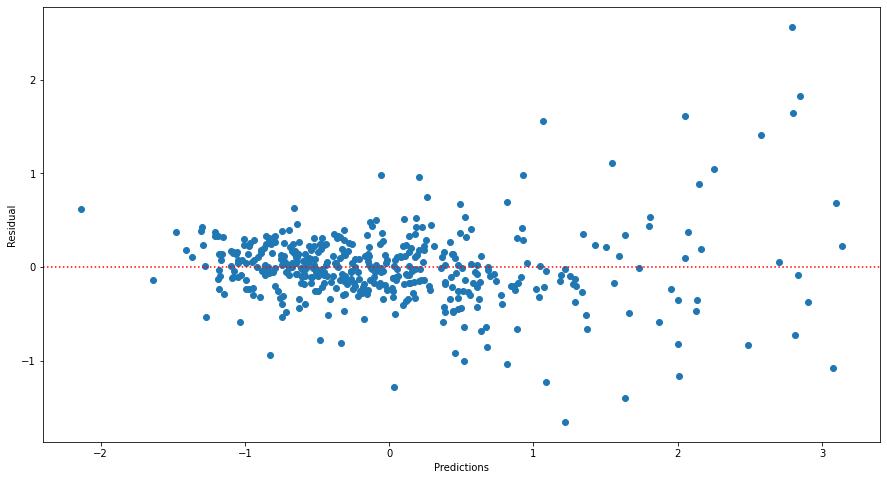

In [371]:
# data['res'] = y_res
plt.figure(figsize=(15, 8))
plt.scatter( y_test_pred , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Text(0.5, 0, 'Errors')

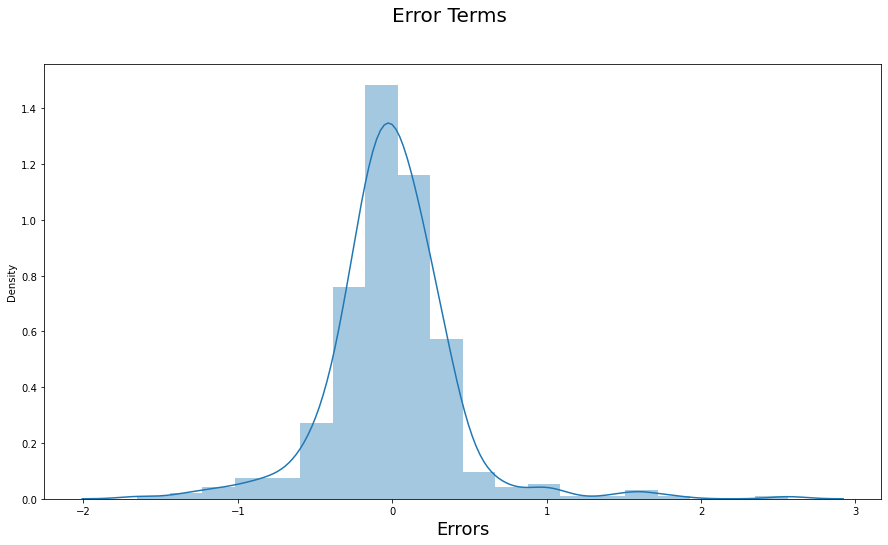

In [372]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(15, 8))
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

### Number of predictors are bit high, so we want regulerize using ridge and Lasso methods

### Ridge Regression

#### With Train data

In [373]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

,Lambda,r2 score,Total fetaures,rss,mse,rmse
0,0.000,86.1,50,141.64,0.14,0.37
1,0.001,86.1,50,141.64,0.14,0.37
2,0.010,86.1,50,141.64,0.14,0.37
3,0.100,86.1,50,141.66,0.14,0.37
4,0.200,86.1,50,141.72,0.14,0.37
5,0.400,86.1,50,141.92,0.14,0.37
6,1.000,86.0,50,142.83,0.14,0.37
7,10.000,84.2,50,161.02,0.16,0.40


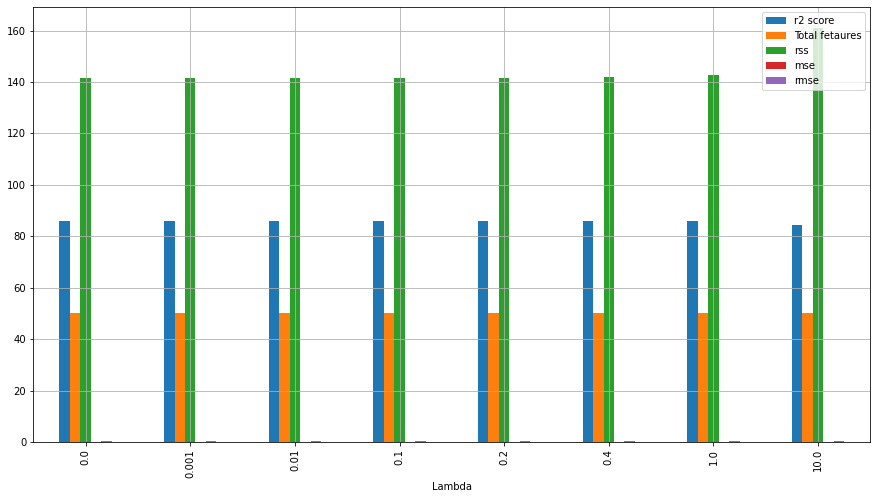

In [374]:
dict_frame = {'Index Title':X_train_rfe1.columns }
ridge_coeff_df = pd.DataFrame(dict_frame)

lambdas = [0, 0.001, 0.01, 0.1, 0.2, 0.4, 1, 10,]

ridge_result_dict={}
ridge_result_dict['Lambda'] =[]
ridge_result_dict['r2 score'] =[]
ridge_result_dict['Total fetaures'] =[]
ridge_result_dict['rss'] =[]
ridge_result_dict['mse'] =[]
ridge_result_dict['rmse'] =[]

for i in lambdas:
    ridgereg = Ridge(alpha = i) 
    ridgereg.fit(X_train_rfe1, y_train)

    ridge_coeff_df[str(i)] = ridgereg.coef_ 

    y_ridge_pred = ridgereg.predict(X_train_rfe1)

    r2 =  round(r2_score(y_train, y_ridge_pred),3)
    total_fetaures = ridgereg.n_features_in_
    ridge_result_dict['Lambda'].append(i)
    ridge_result_dict['r2 score'].append(r2*100)
    ridge_result_dict['Total fetaures'].append(total_fetaures)
    
    rss = round( np.sum(np.square(y_train - y_ridge_pred)),2)
    mse = round(mean_squared_error(y_train, y_ridge_pred), 2)
    rmse = round(mse**0.5,2)
    
    ridge_result_dict['rss'].append(rss)
    ridge_result_dict['mse'].append(mse)
    ridge_result_dict['rmse'].append(rmse)

ridge_result_df = pd.DataFrame(ridge_result_dict)
ridge_result_df.set_index('Lambda').plot.bar(figsize=(15, 8)).grid(True)
ridge_result_df

In [375]:
ridge_coeff_df

,Index Title,0,0.001,0.01,0.1,0.2,0.4,1,10
0,const,5.795953e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LotArea,6.024018e-02,0.060098,0.060092,0.060035,0.059974,0.059861,0.059577,0.059579
2,BsmtExposure,6.240904e-02,0.062352,0.062402,0.062894,0.063415,0.064391,0.066914,0.080811
3,BsmtUnfSF,-9.084728e-02,-0.090774,-0.090716,-0.090165,-0.089602,-0.088593,-0.086141,-0.069987
4,TotalBsmtSF,1.845561e-01,0.184544,0.184640,0.185574,0.186565,0.188422,0.193266,0.226344
5,KitchenQual,9.343413e-02,0.093548,0.093658,0.094773,0.096022,0.098517,0.105685,0.165740
6,MSZoning_RM,-1.453651e-01,-0.145783,-0.145762,-0.145530,-0.145248,-0.144645,-0.142810,-0.130351
7,LotShape_IR3,-3.376709e-01,-0.337766,-0.337548,-0.335371,-0.332957,-0.328156,-0.314136,-0.187869
8,LotConfig_CulDSac,1.379583e-01,0.138027,0.138099,0.138793,0.139510,0.140801,0.143845,0.148823
9,Neighborhood_BrkSide,1.376274e-01,0.136895,0.136828,0.136171,0.135468,0.134124,0.130433,0.095026


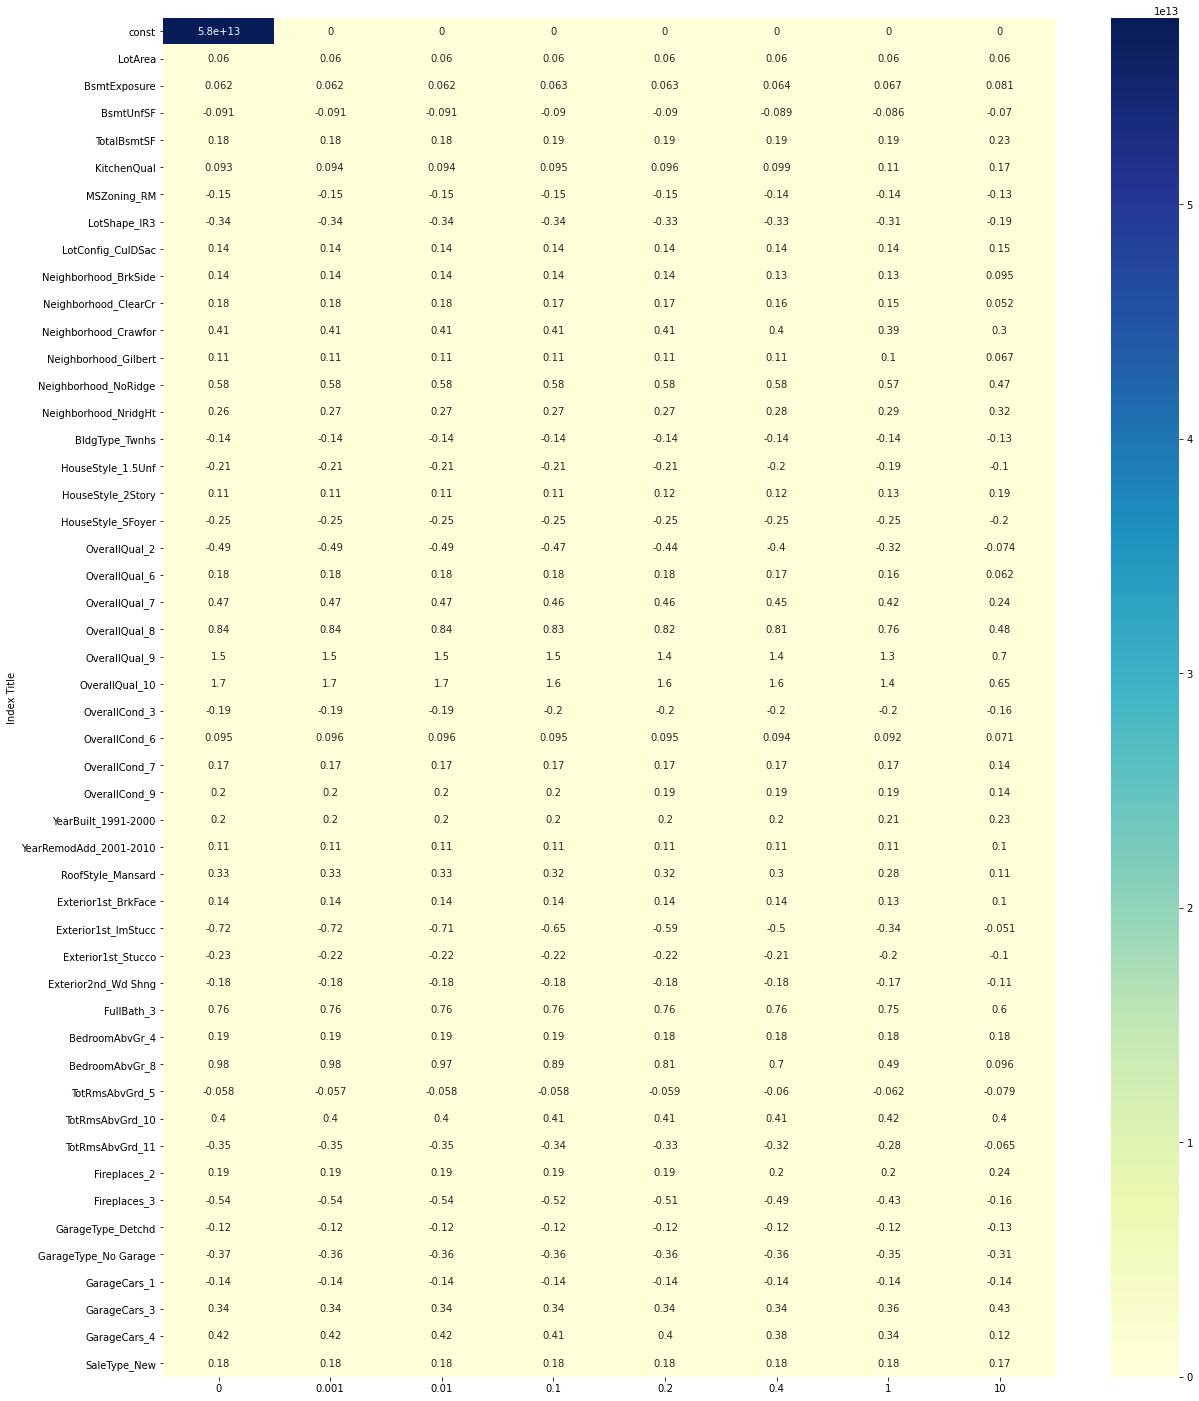

In [376]:
plt.figure(figsize=(20,25))
ax = sns.heatmap(ridge_coeff_df.set_index('Index Title'),annot = True,cmap="YlGnBu")
plt.show()

### Ridge Regression

#### With Test data

,Lambda,r2 score,Total fetaures,rss,mse,rmse
0,0.000,88.0,50,52.70,0.12,0.35
1,0.001,88.0,50,52.57,0.12,0.35
2,0.010,88.0,50,52.57,0.12,0.35
3,0.100,88.0,50,52.60,0.12,0.35
4,0.200,88.0,50,52.69,0.12,0.35
5,0.400,87.9,50,52.99,0.12,0.35
6,1.000,87.6,50,54.33,0.12,0.35
7,10.000,84.2,50,69.00,0.16,0.40


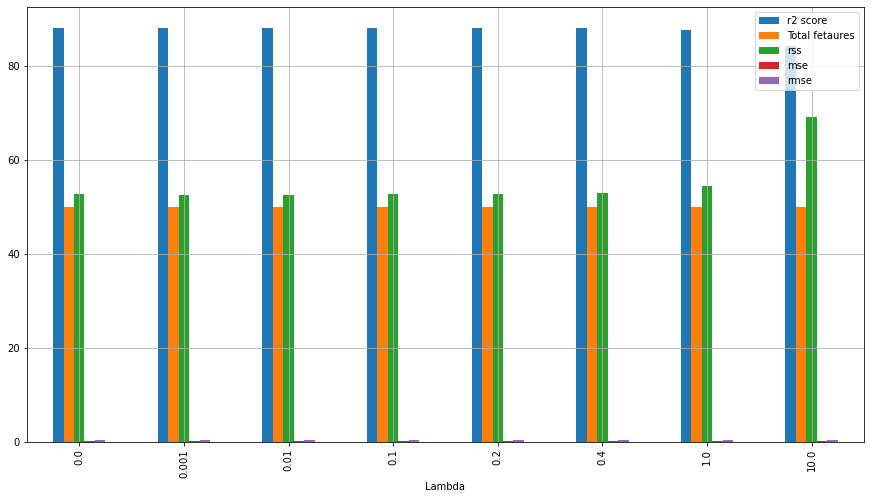

In [377]:

dict_frame = {'Index Title':X_train_rfe1.columns }
ridge_test_coeff_df = pd.DataFrame(dict_frame)

lambdas = [0, 0.001, 0.01, 0.1, 0.2,0.4, 1, 10,]

ridge_test_result_dict={}
ridge_test_result_dict['Lambda'] =[]
ridge_test_result_dict['r2 score'] =[]
ridge_test_result_dict['Total fetaures'] =[]
ridge_test_result_dict['rss'] =[]
ridge_test_result_dict['mse'] =[]
ridge_test_result_dict['rmse'] =[]

for i in lambdas:
    ridgereg = Ridge(alpha = i) 
    ridgereg.fit(X_test_new, y_test)

    ridge_test_coeff_df[str(i)] = ridgereg.coef_ 

    y_ridge_test_pred = ridgereg.predict(X_test_new)

    r2 =  round(r2_score(y_test, y_ridge_test_pred),3)
    total_fetaures = ridgereg.n_features_in_
    ridge_test_result_dict['Lambda'].append(i)
    ridge_test_result_dict['r2 score'].append(r2*100)
    ridge_test_result_dict['Total fetaures'].append(total_fetaures)
    
    rss = round(np.sum(np.square(y_test - y_ridge_test_pred)),2)
    mse = round(mean_squared_error(y_test, y_ridge_test_pred), 2)
    rmse = round(mse**0.5,2)
    
    ridge_test_result_dict['rss'].append(rss)
    ridge_test_result_dict['mse'].append(mse)
    ridge_test_result_dict['rmse'].append(rmse)
    

ridge_test_result_df = pd.DataFrame(ridge_test_result_dict)
ridge_test_result_df.set_index('Lambda').plot.bar(figsize=(15, 8)).grid(True)
ridge_test_result_df
    

In [378]:
ridge_test_coeff_df

,Index Title,0,0.001,0.01,0.1,0.2,0.4,1,10
0,const,-4.657388e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LotArea,7.735728e-02,0.074305,0.074319,0.074459,0.074599,0.074852,0.075508,0.083627
2,BsmtExposure,5.239532e-02,0.053108,0.053112,0.053147,0.053171,0.053185,0.053058,0.051217
3,BsmtUnfSF,-1.224250e-01,-0.122061,-0.122105,-0.122517,-0.122925,-0.123606,-0.124891,-0.119070
4,TotalBsmtSF,2.065864e-01,0.204647,0.205041,0.208839,0.212783,0.219929,0.237013,0.314199
5,KitchenQual,9.946101e-02,0.099957,0.100351,0.104152,0.108098,0.115234,0.132206,0.211822
6,MSZoning_RM,-1.354020e-01,-0.136632,-0.136466,-0.134919,-0.133407,-0.130876,-0.125701,-0.111761
7,LotShape_IR3,2.203637e-01,0.217413,0.216088,0.203827,0.191988,0.172490,0.133633,0.033517
8,LotConfig_CulDSac,2.038969e-01,0.222044,0.221788,0.219301,0.216681,0.211814,0.199358,0.117894
9,Neighborhood_BrkSide,1.737745e-01,0.196261,0.196772,0.201466,0.205921,0.213005,0.225267,0.183633


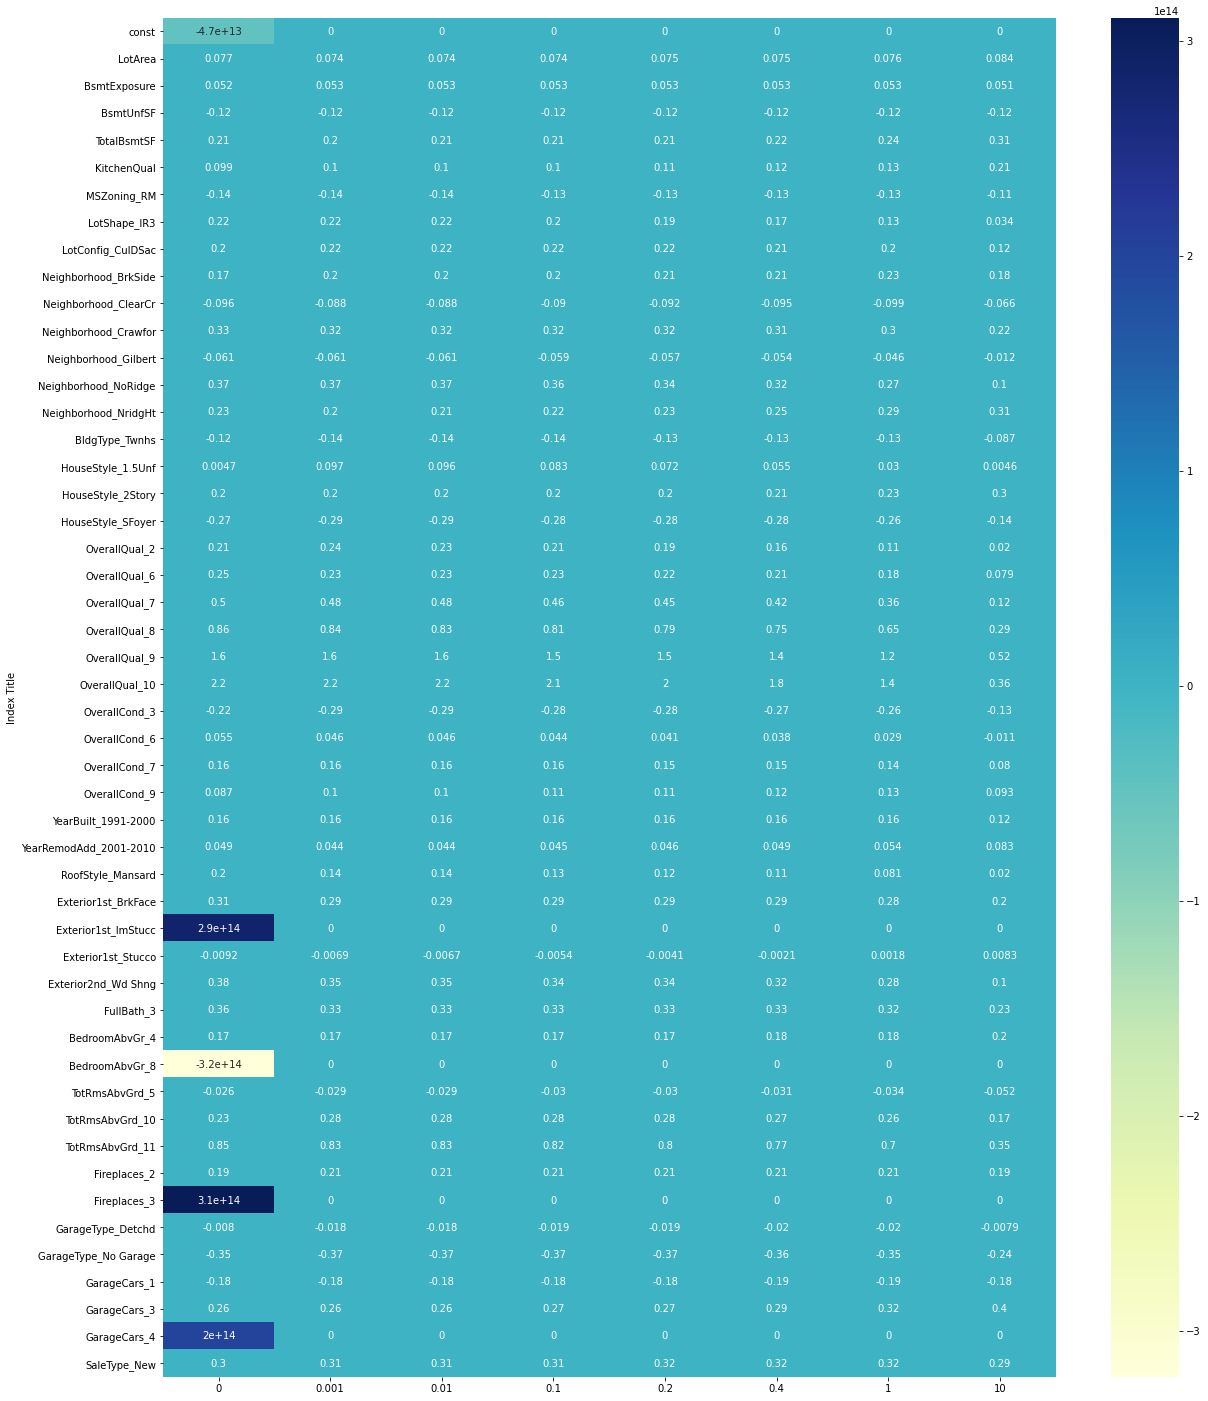

In [379]:
plt.figure(figsize=(20,25))
ax = sns.heatmap(ridge_test_coeff_df.set_index('Index Title'),annot = True,cmap="YlGnBu")
plt.show()

### Lasso Regression

#### With Train Data

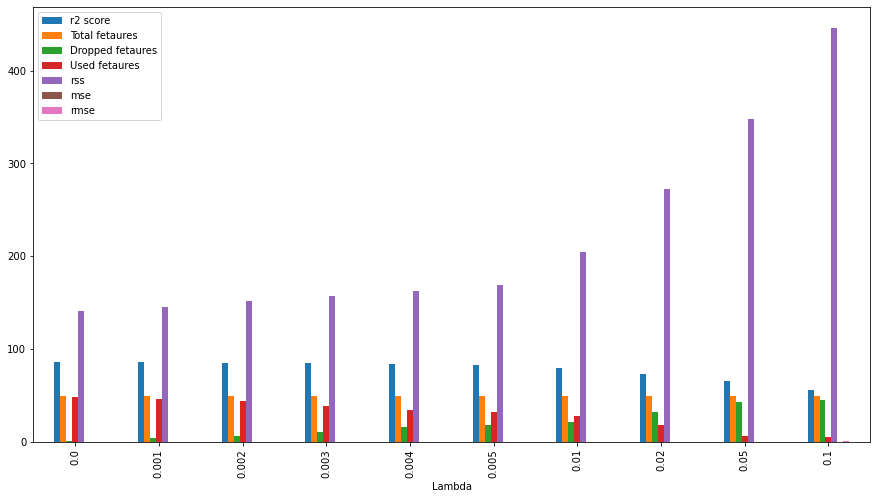

,Lambda,r2 score,Total fetaures,Dropped fetaures,Used fetaures,rss,mse,rmse
0,0.000,86.1,50,1,49,141.64,0.14,0.37
1,0.001,85.7,50,4,46,145.60,0.14,0.37
2,0.002,85.1,50,6,44,151.68,0.15,0.39
3,0.003,84.6,50,11,39,157.18,0.15,0.39
4,0.004,84.1,50,16,34,162.82,0.16,0.40
5,0.005,83.5,50,18,32,168.87,0.17,0.41
6,0.010,80.0,50,22,28,204.70,0.20,0.45
7,0.020,73.3,50,32,18,272.13,0.27,0.52
8,0.050,65.9,50,43,7,348.06,0.34,0.58
9,0.100,56.3,50,45,5,446.04,0.44,0.66


In [380]:
dict_frame = {'Index Title':X_train_rfe1.columns }
lasso_coeff_df = pd.DataFrame(dict_frame)
    
lambdas = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01,0.02, 0.05, 0.1 ]

lasso_result_dict={}
lasso_result_dict['Lambda'] =[]
lasso_result_dict['r2 score'] =[]
lasso_result_dict['Total fetaures'] =[]
lasso_result_dict['Dropped fetaures'] =[]
lasso_result_dict['Used fetaures'] =[]
lasso_result_dict['rss'] =[]
lasso_result_dict['mse'] =[]
lasso_result_dict['rmse'] =[]


for i in lambdas:
    lassoreg = Lasso(alpha = i) 
    lassoreg.fit(X_train_rfe1, y_train)
    y_lasso_pred = lassoreg.predict(X_train_rfe1)
    
    r2 =  round(r2_score(y_train, y_lasso_pred),3)
    total_fetaures = lassoreg.n_features_in_
    dropped_fetaures = len(lassoreg.coef_) - len(lassoreg.coef_[lassoreg.coef_ != 0])
    used_fetaures = len(lassoreg.coef_[lassoreg.coef_ != 0])
    
    lasso_coeff_df[str(i)] = lassoreg.coef_ 
    
    lasso_result_dict['Lambda'].append(i)
    lasso_result_dict['r2 score'].append(r2*100)
    lasso_result_dict['Total fetaures'].append(total_fetaures)
    lasso_result_dict['Dropped fetaures'].append(dropped_fetaures)
    lasso_result_dict['Used fetaures'].append(used_fetaures)
    
    rss = round( np.sum(np.square(y_train - y_lasso_pred)),2)
    mse = round(mean_squared_error(y_train, y_lasso_pred), 2)
    rmse = round(mse**0.5,2)
    
    lasso_result_dict['rss'].append(rss)
    lasso_result_dict['mse'].append(mse)
    lasso_result_dict['rmse'].append(rmse)
    
    

lasso_result_df = pd.DataFrame(lasso_result_dict)
lasso_result_df.set_index('Lambda').plot.bar(figsize=(15, 8))
plt.show()
lasso_result_df


,Index Title,0,0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.05,0.1
0,const,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LotArea,0.060099,0.060576,0.061329,0.060012,0.060931,0.062295,0.066862,0.075488,0.069622,0.037235
2,BsmtExposure,0.062346,0.065757,0.070019,0.071629,0.071982,0.071961,0.075996,0.079169,0.073299,0.050999
3,BsmtUnfSF,-0.090780,-0.079287,-0.070727,-0.063358,-0.058158,-0.053912,-0.036537,-0.010336,-0.000000,0.000000
4,TotalBsmtSF,0.184534,0.189245,0.190801,0.194129,0.202310,0.211843,0.252791,0.288253,0.313803,0.297976
5,KitchenQual,0.093535,0.107165,0.123011,0.139321,0.155239,0.171122,0.245952,0.329024,0.374779,0.410524
6,MSZoning_RM,-0.145786,-0.139610,-0.133273,-0.129503,-0.126081,-0.121850,-0.101040,-0.060516,-0.000000,-0.000000
7,LotShape_IR3,-0.337790,-0.238249,-0.140998,-0.023035,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
8,LotConfig_CulDSac,0.138019,0.134940,0.130297,0.121205,0.110675,0.099070,0.037079,0.000000,0.000000,0.000000
9,Neighborhood_BrkSide,0.136903,0.088081,0.039918,0.004626,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000


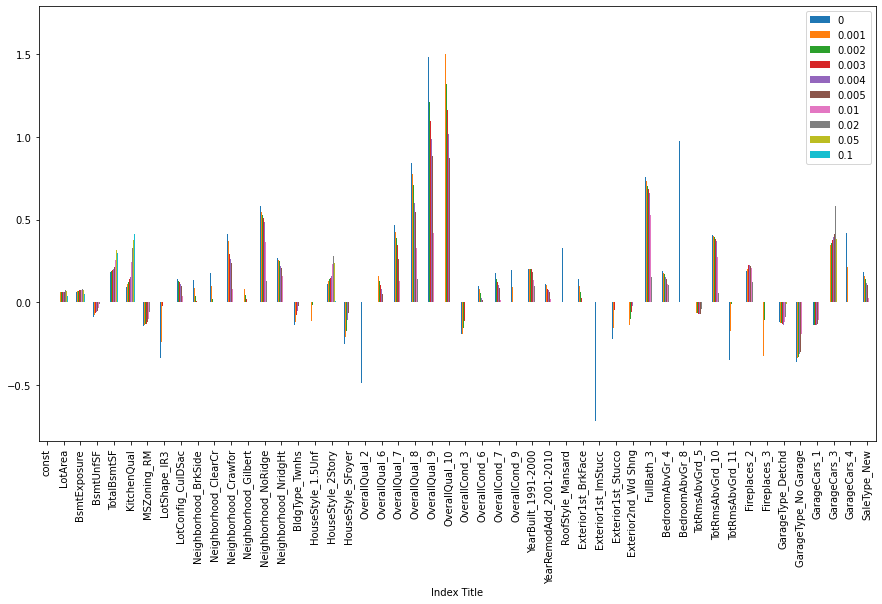

In [381]:

lasso_coeff_df.set_index('Index Title').plot.bar(figsize=(15, 8))
lasso_coeff_df

#### Features used in the lasso

In [382]:
sel_df = lasso_coeff_df[['Index Title','0.01']][lasso_coeff_df['0.01'] != 0]
sel_df.reset_index(inplace=True, drop=True)
sel_df

,Index Title,0.01
0,LotArea,0.066862
1,BsmtExposure,0.075996
2,BsmtUnfSF,-0.036537
3,TotalBsmtSF,0.252791
4,KitchenQual,0.245952
5,MSZoning_RM,-0.101040
6,LotConfig_CulDSac,0.037079
7,Neighborhood_Crawfor,0.078669
8,Neighborhood_NoRidge,0.363773
9,Neighborhood_NridgHt,0.161139


In [383]:
high_coeff_lasso = sel_df[(sel_df['0.01'] > 0.3) | (sel_df['0.01'] < -0.3)]
# sel_df[['Index Title','0.01']][(sel_df['0.01'] > 0.3) | (sel_df['0.01'] < -0.3)]
high_coeff_lasso

,Index Title,0.01
8,Neighborhood_NoRidge,0.363773
12,OverallQual_8,0.327972
13,OverallQual_9,0.417076
18,FullBath_3,0.530466
26,GarageCars_3,0.503178


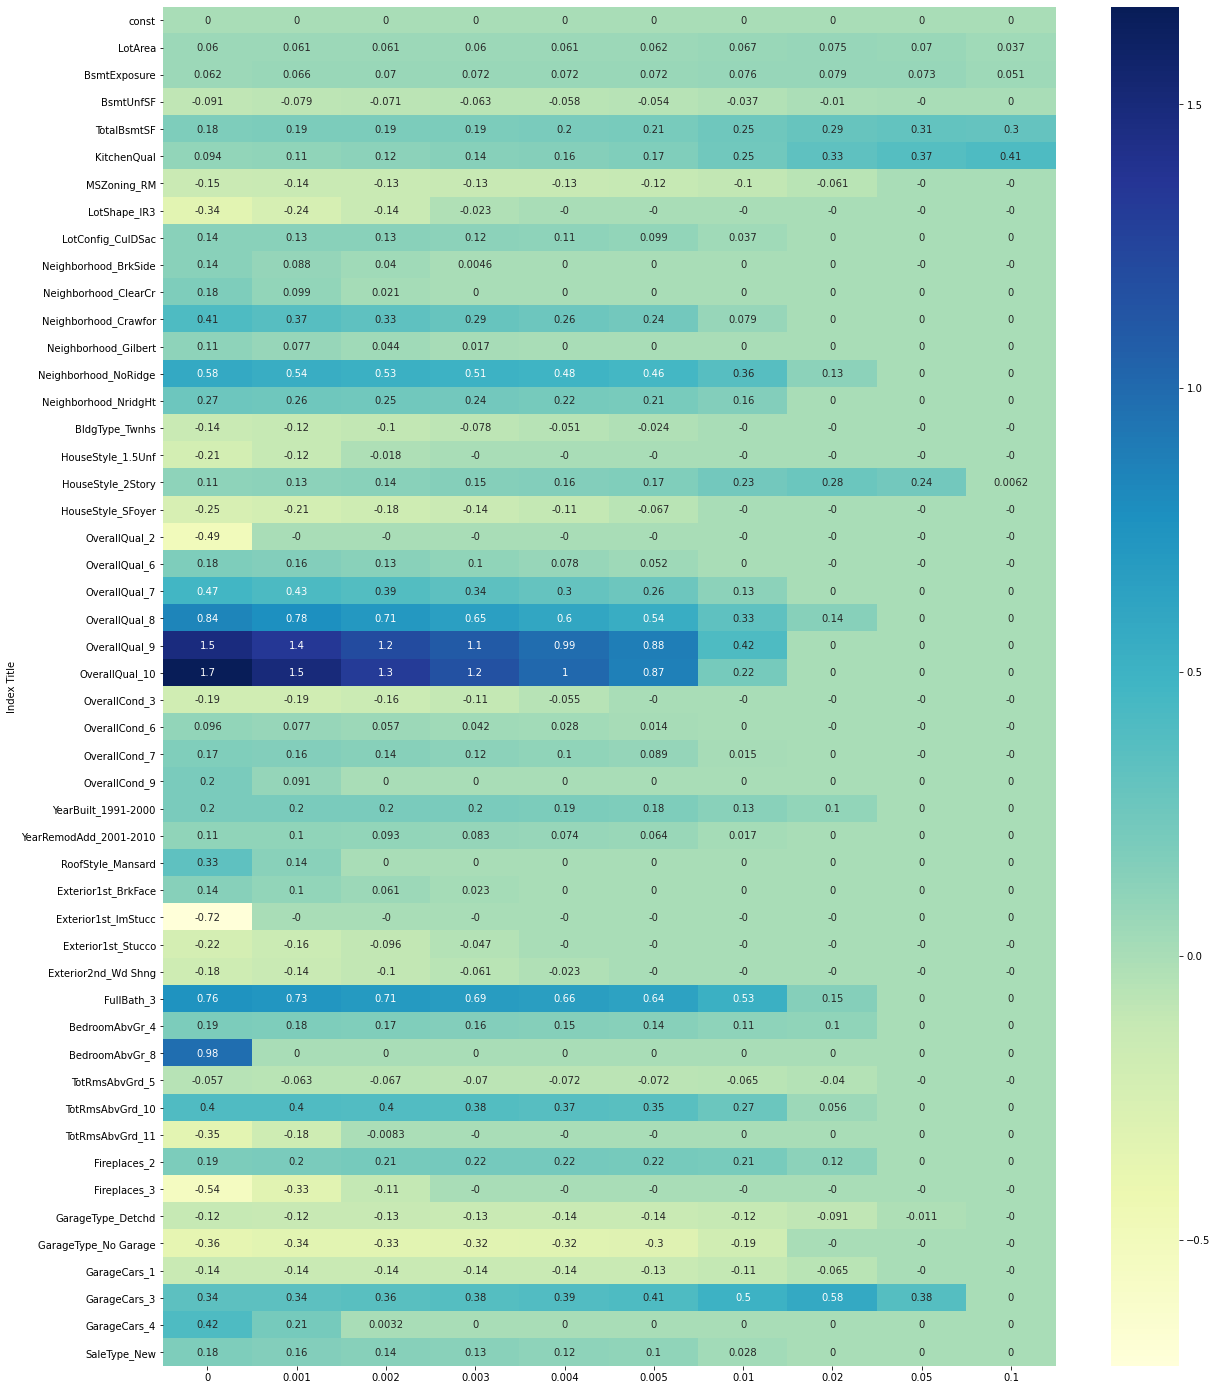

In [384]:
plt.figure(figsize=(20,25))
ax = sns.heatmap(lasso_coeff_df.set_index('Index Title'),annot = True,cmap="YlGnBu")
plt.show()

### Lasso Regression

#### With test data

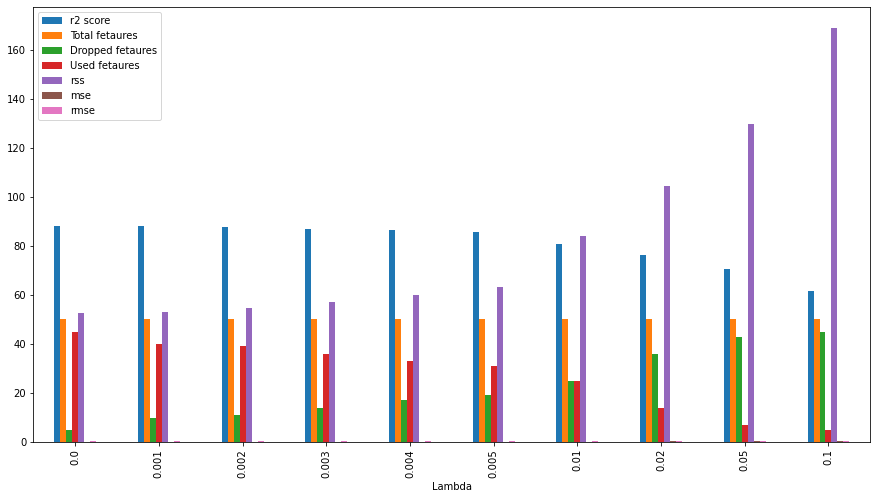

,Lambda,r2 score,Total fetaures,Dropped fetaures,Used fetaures,rss,mse,rmse
0,0.000,88.0,50,5,45,52.57,0.12,0.35
1,0.001,87.9,50,10,40,53.20,0.12,0.35
2,0.002,87.5,50,11,39,54.68,0.12,0.35
3,0.003,87.0,50,14,36,56.95,0.13,0.36
4,0.004,86.3,50,17,33,59.91,0.14,0.37
5,0.005,85.6,50,19,31,63.04,0.14,0.37
6,0.010,80.9,50,25,25,83.85,0.19,0.44
7,0.020,76.2,50,36,14,104.31,0.24,0.49
8,0.050,70.4,50,43,7,129.70,0.30,0.55
9,0.100,61.4,50,45,5,168.87,0.39,0.62


In [385]:
dict_frame = {'Index Title':X_train_rfe1.columns }
lasso_test_coeff_df = pd.DataFrame(dict_frame)

lasso_test_result_dict={}
lasso_test_result_dict['Lambda'] =[]
lasso_test_result_dict['r2 score'] =[]
lasso_test_result_dict['Total fetaures'] =[]
lasso_test_result_dict['Dropped fetaures'] =[]
lasso_test_result_dict['Used fetaures'] =[]
lasso_test_result_dict['rss'] =[]
lasso_test_result_dict['mse'] =[]
lasso_test_result_dict['rmse'] =[]

lambdas = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02,0.05, 0.1 ]

for i in lambdas:
    lassoreg = Lasso(alpha = i) 
    lassoreg.fit(X_test_new, y_test)  
    y_lasso_test_pred = lassoreg.predict(X_test_new)
    
    r2 =  round(r2_score(y_test, y_lasso_test_pred),3)*100
    total_fetaures = lassoreg.n_features_in_
    dropped_fetaures = len(lassoreg.coef_) - len(lassoreg.coef_[lassoreg.coef_ != 0])
    used_fetaures = len(lassoreg.coef_[lassoreg.coef_ != 0])
    
    lasso_test_coeff_df[str(i)] = lassoreg.coef_ 
    
    lasso_test_result_dict['Lambda'].append(i)
    lasso_test_result_dict['r2 score'].append(r2)
    lasso_test_result_dict['Total fetaures'].append(total_fetaures)
    lasso_test_result_dict['Dropped fetaures'].append(dropped_fetaures)
    lasso_test_result_dict['Used fetaures'].append(used_fetaures)
    
    rss = round( np.sum(np.square(y_test - y_lasso_test_pred)),2)
    mse = round(mean_squared_error(y_test, y_lasso_test_pred), 2)
    rmse = round(mse**0.5,2)
    
    lasso_test_result_dict['rss'].append(rss)
    lasso_test_result_dict['mse'].append(mse)
    lasso_test_result_dict['rmse'].append(rmse)

    
    
lasso_test_result_df = pd.DataFrame(lasso_test_result_dict)
lasso_test_result_df.set_index('Lambda').plot.bar(figsize=(15, 8))
plt.show()
lasso_test_result_df


,Index Title,0,0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.05,0.1
0,const,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LotArea,0.074303,0.077470,0.082167,0.088057,0.093814,0.098336,0.107280,0.113977,0.104907,0.072928
2,BsmtExposure,0.053107,0.048446,0.044954,0.042410,0.040115,0.038494,0.040293,0.039946,0.045546,0.020290
3,BsmtUnfSF,-0.122056,-0.121772,-0.121063,-0.119088,-0.116504,-0.112838,-0.098377,-0.079710,-0.013699,-0.000000
4,TotalBsmtSF,0.204603,0.223366,0.242403,0.259290,0.275167,0.289372,0.346798,0.393850,0.378046,0.349438
5,KitchenQual,0.099913,0.116458,0.134185,0.149981,0.165567,0.180758,0.252967,0.304860,0.359276,0.403972
6,MSZoning_RM,-0.136650,-0.124625,-0.117546,-0.113317,-0.108850,-0.102796,-0.067629,-0.008449,-0.000000,-0.000000
7,LotShape_IR3,0.217561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,LotConfig_CulDSac,0.222073,0.193342,0.166274,0.136641,0.105354,0.073988,0.000000,0.000000,0.000000,0.000000
9,Neighborhood_BrkSide,0.196204,0.202225,0.191763,0.181214,0.167663,0.147879,0.040281,0.000000,0.000000,0.000000


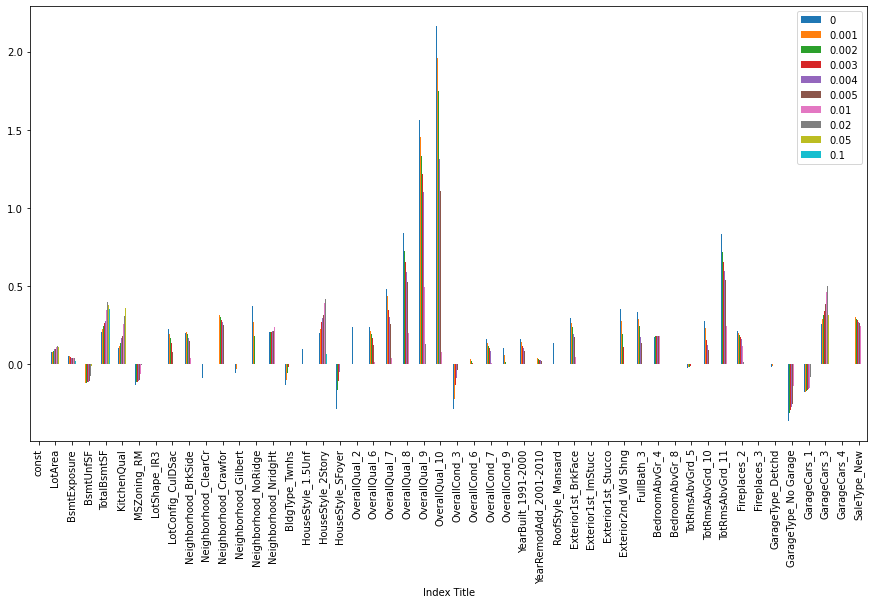

In [386]:
lasso_test_coeff_df.set_index('Index Title').plot.bar(figsize=(15, 8))
lasso_test_coeff_df

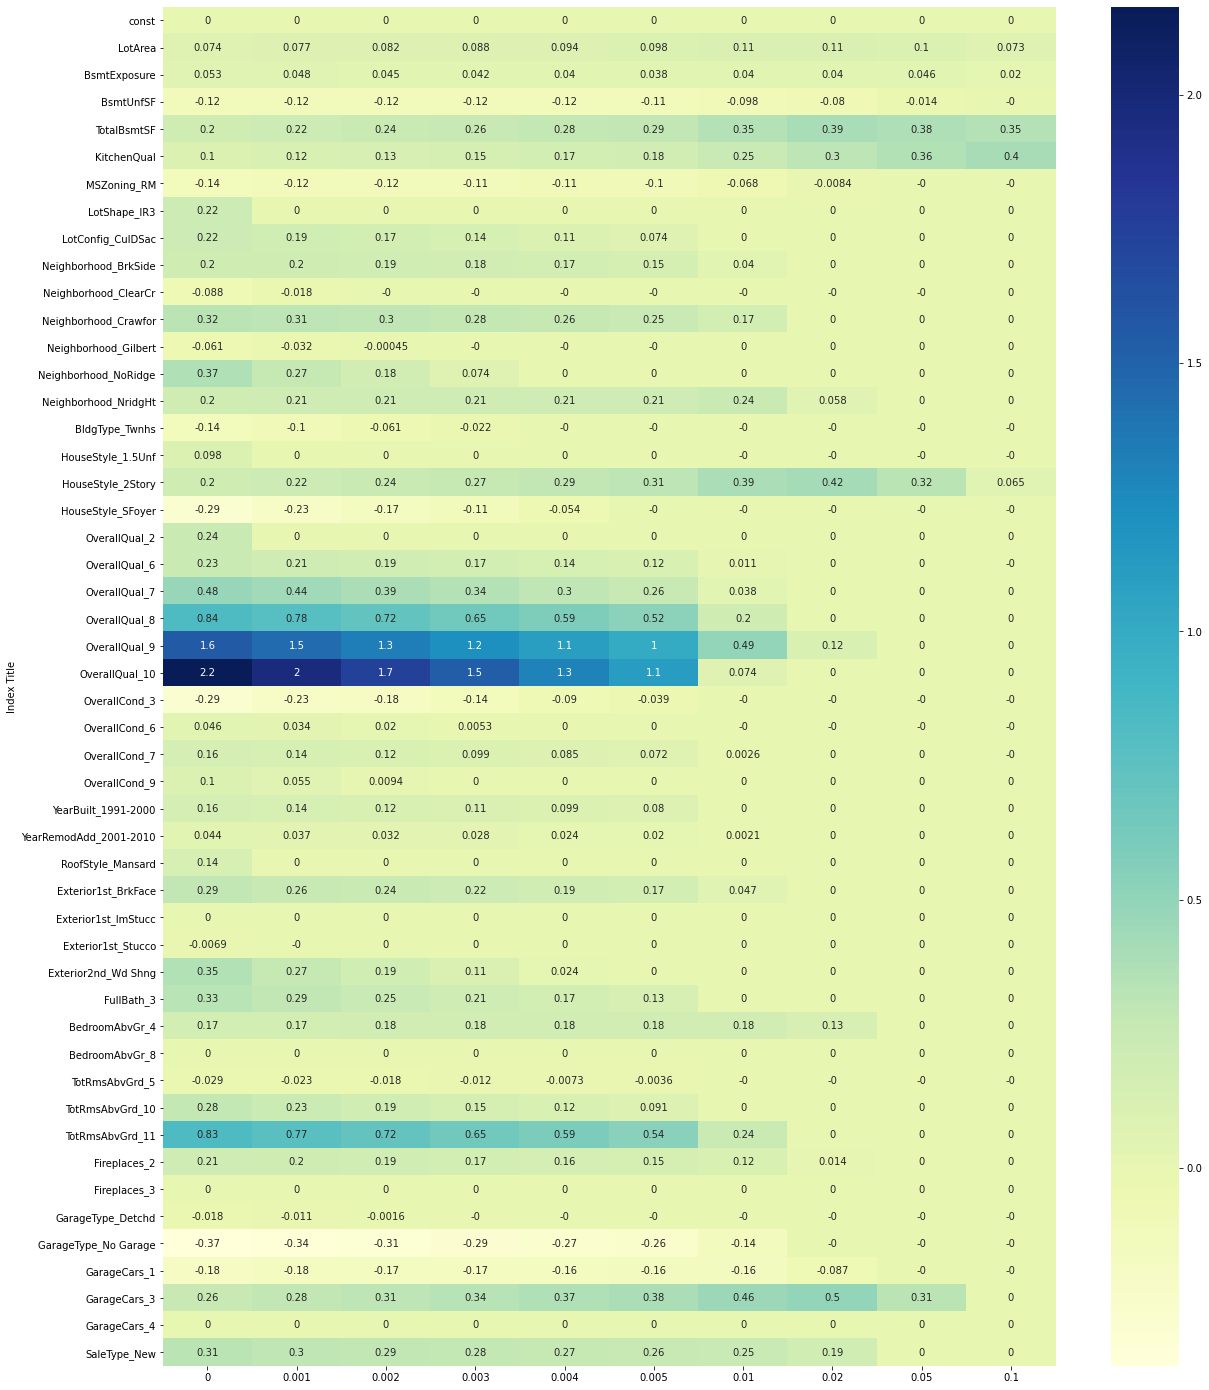

In [387]:
plt.figure(figsize=(20,25))
ax = sns.heatmap(lasso_test_coeff_df.set_index('Index Title'),annot = True,cmap="YlGnBu")
plt.show()

### Observations:

- Lasso regression is giving good results compared to ridge regression.
- Lasso reduced features to 50% and r2 is 80%
- Ridge is giving slightly better r2 score but it didn't reduce features.


## REMODELLED With Lasso

In [388]:
# Dropped Columns : ['Neighborhood_NoRidge', 'OverallQual_8', 'OverallQual_9', 'FullBath_3', 'GarageCars_3']  
#These variable have high coefficient values so dropping them. As per Question-3 asked to do.

lambdas = 0.002
new_col =['const','LotArea', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'KitchenQual', 
          'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 
          'Neighborhood_NridgHt', 'HouseStyle_2Story', 'OverallQual_7', 
          'OverallQual_10', 'OverallCond_7', 'YearBuilt_1991-2000',
          'YearRemodAdd_2001-2010', 'FullBath_3', 'BedroomAbvGr_4', 'TotRmsAbvGrd_5', 
          'TotRmsAbvGrd_10', 'Fireplaces_2', 'GarageType_Detchd', 'GarageType_No Garage', 
          'GarageCars_1', 'GarageCars_3', 'SaleType_New']

X_train_selected = X_train_rfe1[new_col]

lassoreg_2 = Lasso(alpha = lambdas) 
lassoreg_2.fit(X_train_selected, y_train)
y_lasso2_pred = lassoreg_2.predict(X_train_selected)

r2 =  round(r2_score(y_train, y_lasso2_pred),3)
print('r2: ',r2)
rss = round( np.sum(np.square(y_train - y_lasso2_pred)),2)
print('rss: ',rss)
mse = round(mean_squared_error(y_train, y_lasso2_pred), 2)
print('mse: ',mse)
rmse = round(mse**0.5,2)
print('rmse: ',rmse)

dict_frame1 = {'Index':X_train_selected.columns }
lasso_select_coeff_df = pd.DataFrame(dict_frame1)

lasso_select_coeff_df['0.002'] =lassoreg_2.coef_
lasso_select_coeff_df

r2:  0.796
rss:  207.82
mse:  0.2
rmse:  0.45


,Index,0.002
0,const,0.000000
1,LotArea,0.055063
2,BsmtExposure,0.075725
3,BsmtUnfSF,-0.049833
4,TotalBsmtSF,0.243631
5,KitchenQual,0.213663
6,MSZoning_RM,-0.121066
7,LotConfig_CulDSac,0.169878
8,Neighborhood_Crawfor,0.370277
9,Neighborhood_NridgHt,0.384268


In [389]:
high_coeff_lasso_2 = lasso_select_coeff_df[(lasso_select_coeff_df['0.002'] > 0.39) | (lasso_select_coeff_df['0.002'] < -0.39)]
# sel_df[['Index Title','0.01']][(sel_df['0.01'] > 0.3) | (sel_df['0.01'] < -0.3)]
high_coeff_lasso_2

,Index,0.002
12,OverallQual_10,0.476151
16,FullBath_3,0.772222
19,TotRmsAbvGrd_10,0.474991
22,GarageType_No Garage,-0.399299
24,GarageCars_3,0.635553
